# **Lending Club Case Study**

**Problem Statement:** The given dataset contains information about past loans applicants and whether they defaulted or not. Each row represents the loan details of the applicants.



*   If the applicant is likely to repay the loan, then not approving loan is a loss of business to the company (rejecting loans for non - default).
*   If the applicant is not likely to repay the loan, then approving loan may lead to financial loss to the company (approving loans for default).


**Objective:** By performing the Exploratory Data Analysis the objective is to minimizing the Risk factor behind loan default, i.e. the variables which are strong indicators of default. With the help of this case study, company can utilize this knowledge for its portfolio and risk assessment.


**Goal:** How data can be used to minimize the risk of losing money while lending to customers via using below mentioned steps:




1.   Understanding the Data with the help of Python Libraries.
2.   Data Cleaning (Missing Value Treatment, Removing Redundant Columns etc.)
3.   Performing univariate, bivariate analysis etc to derived the decision making via using Data Analysis Technique.
4.   Recommendations.






# Importing the libraries which will be used in the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# setting max columns and rows to display
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# set colwidth to display
pd.set_option('display.max_colwidth', 100)

In [3]:
#Loading the dataset for the analysis using pandas library and checking the first 5 Rows
Loan_data = pd.read_csv('loan.csv')
Loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Ja

In [4]:
#Checking the shape of the Dataset
Loan_data.shape

(39717, 111)

###There are 39717 Rows and 111 Columns in the dataset

In [5]:
#Checking the null value of the dataset
Loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
# Checking column with large amount of null values(in percentage).
(Loan_data.isnull().sum()/Loan_data.shape[0]*100).round(2).sort_values(ascending=False)

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

##### There are few columns which has more than 90% missing value, which will deviate the analysis and will not help in the inferences; will go ahead and delete the columns which has more than 90% missing value.

In [7]:
# Dropping the columns which has more than 90% null value

Loan_data = Loan_data.drop(columns = Loan_data.loc[:, Loan_data.isnull().mean() > .90].columns)
(Loan_data.isnull().sum()/Loan_data.shape[0]*100).round(2).sort_values(ascending=False)

mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_acc                      0.00
total_pymnt_inv                0.00
recoveries                     0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
pub_rec                        0.00
collection_recovery_fee        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq              

In [8]:
Loan_data.shape

(39717, 55)

### There are 2 columns [mths_since_last_delinq, desc] which has more than 30% Null, value, will go ahead and check if these columns will help in inference, else will drop these columns also.

In [9]:
Loan_data["mths_since_last_delinq"].value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
19.0     238
38.0     237
20.0     233
18.0     231
22.0     231
31.0     229
35.0     227
32.0     226
39.0     224
25.0     223
45.0     222
37.0     217
26.0     217
21.0     216
17.0     214
16.0     214
27.0     212
36.0     210
42.0     208
10.0     208
29.0     207
47.0     206
43.0     201
34.0     201
44.0     200
14.0     198
46.0     197
41.0     197
40.0     197
12.0     195
48.0     194
28.0     193
6.0      192
33.0     188
9.0      182
7.0      176
13.0     171
8.0      168
11.0     166
4.0      153
49.0     152
5.0      151
58.0     148
3.0      145
59.0     143
53.0     143
52.0     137
56.0     134
73.0     131
50.0     131
55.0     129
68.0     128
63.0     127
60.0     126
57.0     125
72.0     124
71.0     122
70.0     119
54.0     115
74.0     114
67.0     113
62.0     113
75.0     112
76.0     112
61.0     110
69.0     108
51.0     107
79.0     103
2.0      101
66.0     101
78.0      99
64.0      97

In [10]:
Loan_data["desc"].value_counts().unique()


array([210,   8,   6,   3,   2,   1], dtype=int64)

### decs category is provided by the borrower and this will not help to conclude any inferences, as we have another variable which will help to get the details of lean available in the data by the name of 'purpose', moreover, columns name mths_since_last_delinq has more than 60% null values as well; it will not help us to predict the defaulters as well, will go ahead and drop these columns

In [11]:
Loan_data = Loan_data.drop(columns = ['mths_since_last_delinq', 'desc'])

In [12]:
(Loan_data.isnull().sum()/Loan_data.shape[0]*100).round(2).sort_values(ascending=False)

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
total_rec_prncp               0.00
out_prncp                     0.00
initial_list_status           0.00
out_prncp_inv                 0.00
total_acc                     0.00
total_pymnt                   0.00
total_pymnt_inv               0.00
collection_recovery_fee       0.00
total_rec_int                 0.00
total_rec_late_fee            0.00
recoveries                    0.00
pub_rec                       0.00
last_pymnt_amnt               0.00
policy_code                   0.00
application_type              0.00
acc_now_delinq                0.00
delinq_amnt                   0.00
revol_bal                     0.00
id                  

### There are few columns still have in the dataset which have null values, will go ahead and check the details for these values and irrelevant columns which will not be used to analyze the dataset.

In [13]:
# Removing ["zip_code", "title", "url"] as it will not be used for analysis, and 'purpose' metric will help to derive the 'title' variable.
Loan_data = Loan_data.drop(columns = ["zip_code", "title", "url"])

#### Columns that represent past loan approval details, will not be used to conclude to predict the default., will go ahead and delete the columns

In [14]:
Loan_data = Loan_data.drop(columns = ['emp_title',"delinq_2yrs",  "earliest_cr_line",  "inq_last_6mths",  "open_acc",  "pub_rec",  "revol_bal",  "revol_util",  "total_acc",  "out_prncp",
  "out_prncp_inv",  "total_pymnt",  "total_pymnt_inv",  "total_rec_prncp",  "total_rec_int",  "total_rec_late_fee",  "recoveries",  "collection_recovery_fee",  "last_pymnt_d",  "last_pymnt_amnt",  "last_credit_pull_d",  "application_type"])

In [15]:
(Loan_data.isnull().sum()/Loan_data.shape[0]*100).round(2).sort_values(ascending=False)

emp_length                    2.71
pub_rec_bankruptcies          1.75
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
tax_liens                     0.10
loan_status                   0.00
delinq_amnt                   0.00
acc_now_delinq                0.00
policy_code                   0.00
initial_list_status           0.00
dti                           0.00
addr_state                    0.00
purpose                       0.00
pymnt_plan                    0.00
id                            0.00
member_id                     0.00
verification_status           0.00
annual_inc                    0.00
home_ownership                0.00
sub_grade                     0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
issue_d                       0.00
dtype: float64

#### There are missing value in the dataset, will fix these values

In [16]:
Loan_data['emp_length'].value_counts()


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [17]:
#The emp_length variable has object value, need to fix as well, will go ahead and fill the null value with the mode[0]
Loan_data['emp_length'].fillna(Loan_data['emp_length'].mode()[0], inplace=True)

In [18]:
Loan_data['pub_rec_bankruptcies'].value_counts()


0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [19]:
#Will fill the null value with mode as tere is highest count of 0 in the varilable
Loan_data['pub_rec_bankruptcies'].fillna(Loan_data['pub_rec_bankruptcies'].mode()[0], inplace=True)

In [20]:
Loan_data['chargeoff_within_12_mths'].value_counts()


0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [21]:
#There is only 1 value which is gettinf repeated in the will go ahead and fill this value with 0

Loan_data['chargeoff_within_12_mths'].fillna(Loan_data['chargeoff_within_12_mths'].mode()[0], inplace=True)

In [22]:
Loan_data['collections_12_mths_ex_med'].value_counts()


0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [23]:
#There is only 1 value which is gettinf repeated in the will go ahead and fill this value with 0
Loan_data['collections_12_mths_ex_med'].fillna(Loan_data['collections_12_mths_ex_med'].mode()[0], inplace=True)

In [24]:
Loan_data['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [25]:
Loan_data['tax_liens'].fillna(Loan_data['tax_liens'].mode()[0], inplace=True)

In [26]:
(Loan_data.isnull().sum()/Loan_data.shape[0]*100).round(2).sort_values(ascending=False)

id                            0.0
member_id                     0.0
pub_rec_bankruptcies          0.0
delinq_amnt                   0.0
chargeoff_within_12_mths      0.0
acc_now_delinq                0.0
policy_code                   0.0
collections_12_mths_ex_med    0.0
initial_list_status           0.0
dti                           0.0
addr_state                    0.0
purpose                       0.0
pymnt_plan                    0.0
loan_status                   0.0
issue_d                       0.0
verification_status           0.0
annual_inc                    0.0
home_ownership                0.0
emp_length                    0.0
sub_grade                     0.0
grade                         0.0
installment                   0.0
int_rate                      0.0
term                          0.0
funded_amnt_inv               0.0
funded_amnt                   0.0
loan_amnt                     0.0
tax_liens                     0.0
dtype: float64

##### As the null values has been fixed, will perform the Data Analysis in the dataset, to find the objective of this case Study to identify predictors of default.

In [27]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  39717 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

**Correcting datatypes**
*  Column int_rate is marked as object datatype, though it is a numeric column, so we need to standardize data in this column

* Column loan_amnt is marked as object datatype, though it is a numeric column, so we need to standardize data in this column

In [28]:
Loan_data['int_rate'] = Loan_data["int_rate"].str.strip('%').astype('float')
Loan_data['loan_amnt'] = Loan_data["loan_amnt"].astype('int64')


In [29]:
Loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Current State in Loan Status will not help to predict the defaulter, as this state is neither fully paid nor defaulted, hence drop the values which has current State

In [30]:
#Getting the value in the data which has ["Fully Paid ", "Charged Off"]

Loan_data = Loan_data[Loan_data['loan_status'].isin(["Fully Paid", "Charged Off"])]


In [31]:
Loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

# Fixing the data type

In [32]:
Loan_data['loan_status'] = Loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
Loan_data['loan_status'] = Loan_data['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
Loan_data['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [33]:
round(np.mean(Loan_data['loan_status']), 2)

0.15

# Performing Univariate and Segmented Univariate Analysis in the dataset
#### First will check the loan status for Fully Paid and Charged Off

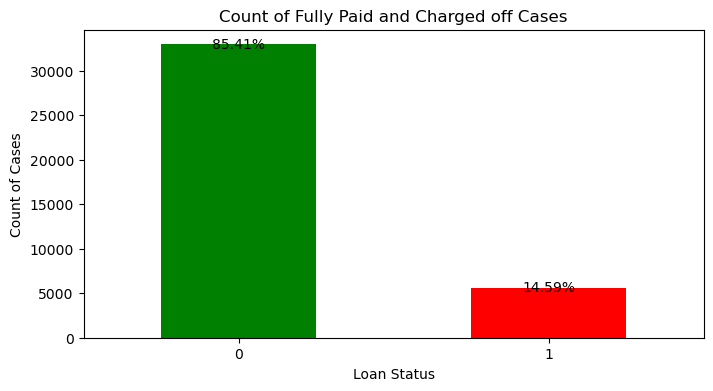

In [34]:
#Visualizing data for Loan Status

loan_status_counts = Loan_data['loan_status'].value_counts()

# Creating a bar plot of the loan status counts
loan_status_counts.plot(kind='bar', title="Count of Fully Paid and Charged off Cases", color=['green','red'])
plt.xlabel('Loan Status')
plt.ylabel('Count of Cases')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(8, 4)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

#####  **Observation:** Defaulted Loans for (Charged Off) are low **14.59%** as compared to the Fully Paid loans which is **85.41%**.

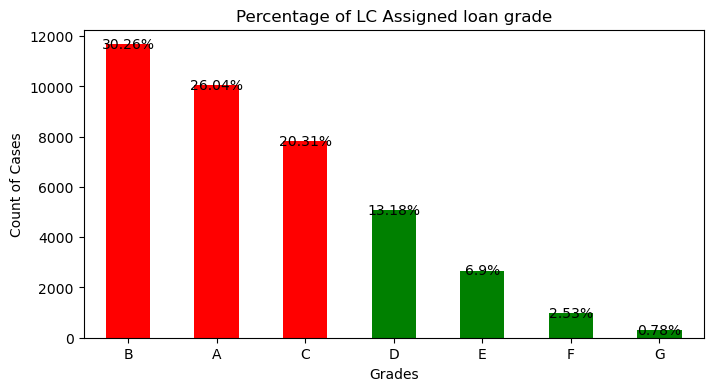

In [35]:
#Visualizing data for Grade
grade_counts = Loan_data['grade'].value_counts()

# Creating a bar plot of the grade counts and showing the contrinution percentage
grade_counts.plot(kind='bar', title="Percentage of LC Assigned loan grade", color=['red','red','red','green','green','green','green'])
plt.xlabel('Grades')
plt.ylabel('Count of Cases')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(8, 4)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()


##### **Observation:** A large amount of loans are with category **A, B and C** grade as compared to other grades, concluding that most loans are high grade loans and contributing **76.61%** in overall loan.



In [36]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=Loan_data)
    plt.xticks(rotation=90)
    plt.figure(figsize=(18,7))
    plt.show()


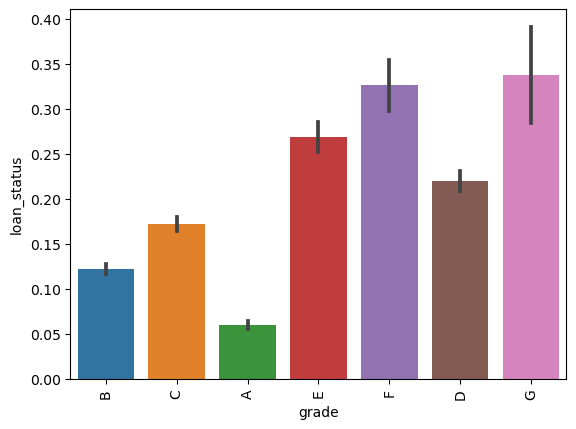

<Figure size 1800x700 with 0 Axes>

In [37]:
# compare default rates across grade of loan
plot_cat('grade')

### Default rate is high for G, F, E and D Grade.

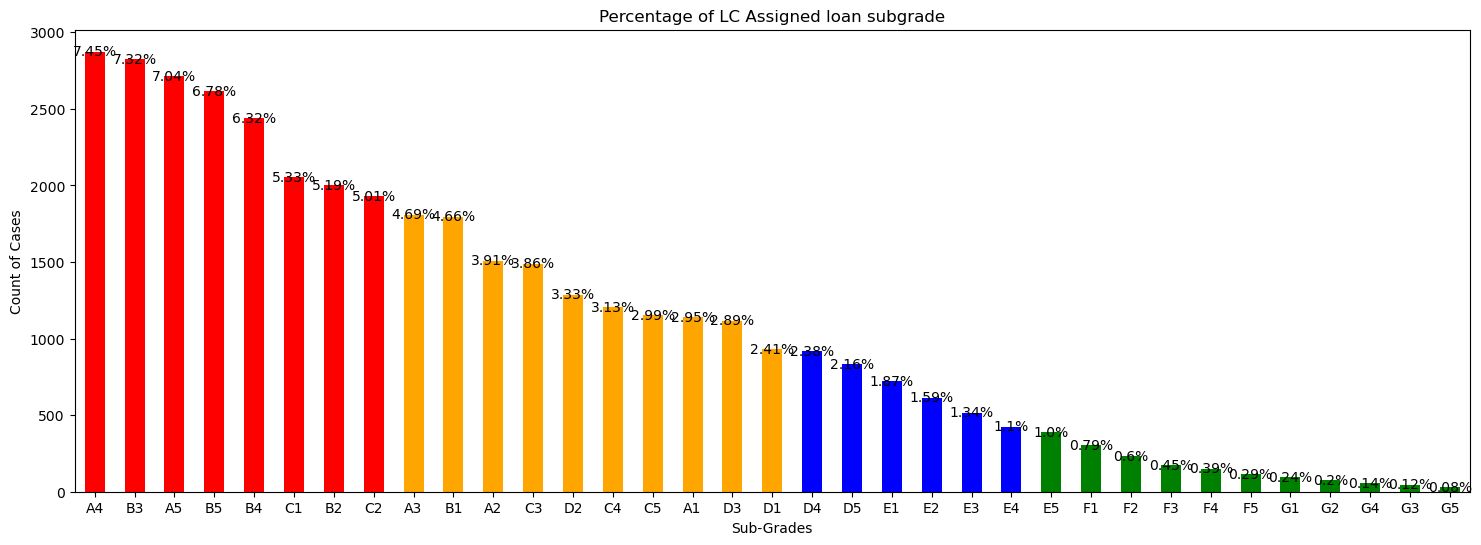

In [38]:
#Visualizing data for Sub-Grade
sub_grade_counts = Loan_data['sub_grade'].value_counts()
import matplotlib.colors as cm

# Creating a bar plot of the Sub - grade counts and showing the contrinution percentage
sub_grade_counts.plot(kind='bar', title="Percentage of LC Assigned loan subgrade", color=['red','red','red','red','red','red','red','red','orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','blue','blue','blue','blue','blue','blue','green','green','green','green','green','green','green','green','green','green','green'])
plt.xlabel('Sub-Grades')
plt.ylabel('Count of Cases')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(18, 6)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()


##### **Observation:** **76.63%** loans are with sub category of A, B and C sub grade as compared to other sub grades.

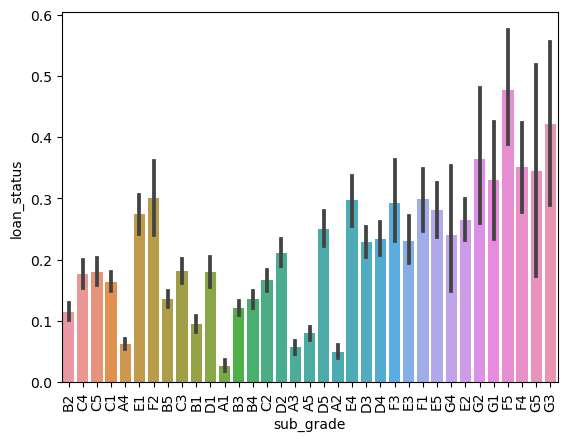

<Figure size 1800x700 with 0 Axes>

In [39]:
# compare default rates across sub grade of loan
plot_cat('sub_grade')

### Default rate is high for G, F and E grades.

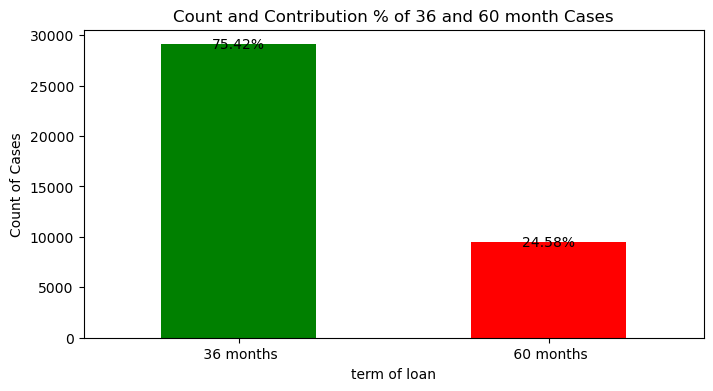

In [40]:
# term: 60 months loans default more than 36 months loans

term_counts = Loan_data['term'].value_counts()

# Creating a bar plot of the term Status
term_counts.plot(kind='bar', title="Count and Contribution % of 36 and 60 month Cases", color=['green','red'])
plt.xlabel('term of loan')
plt.ylabel('Count of Cases')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(8, 4)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()


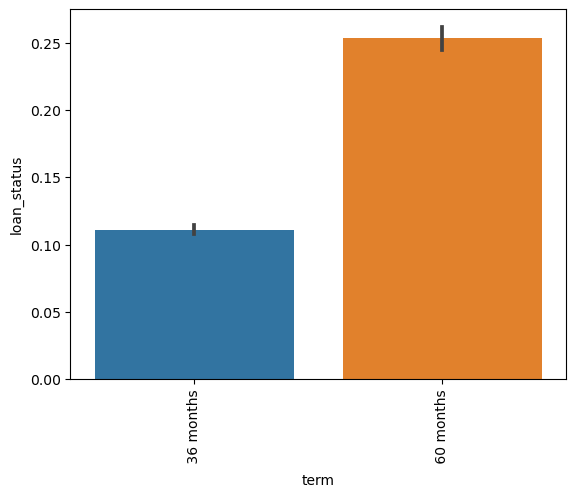

<Figure size 1800x700 with 0 Axes>

In [41]:
#Checking the default rate for Term of Loan. 
plot_cat('term')

### Default rate is high for higher term which is 60 months

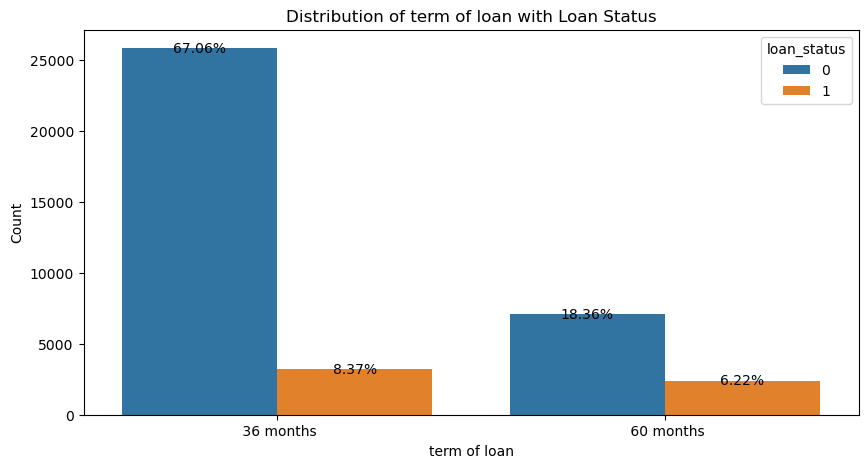

In [42]:
#Checking the distribution of Loan Status with TErm of loan

plt.figure(figsize=(10,5))
sns.countplot(data=Loan_data, x='term', hue='loan_status')
plt.xlabel('term of loan')
plt.ylabel('Count')
plt.title('Distribution of term of loan with Loan Status')
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

##### Observation: Majority of the loans are approved for 36 months period



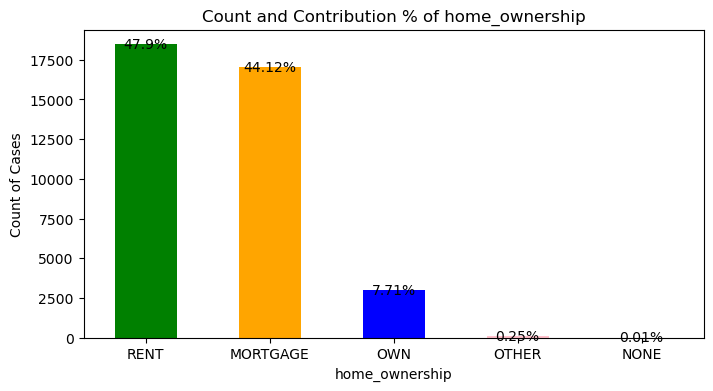

In [43]:
# home ownership: not a great discriminator

home_ownership_counts = Loan_data['home_ownership'].value_counts()

# Creating a bar plot of the term Status
home_ownership_counts.plot(kind='bar', title="Count and Contribution % of home_ownership", color=['green','orange','blue','pink','red'])
plt.xlabel('home_ownership')
plt.ylabel('Count of Cases')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(8, 4)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()


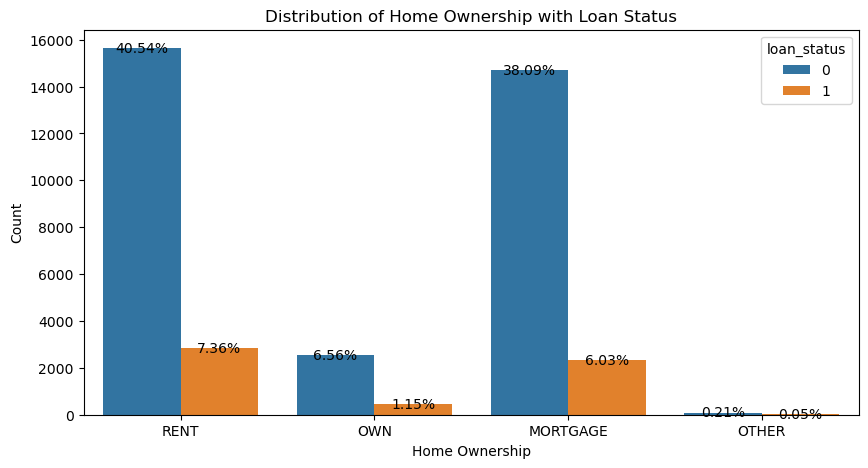

In [44]:
# Creating a bar plot of home_ownership grouping by the Loan Status

home_ownership_data = Loan_data[Loan_data['home_ownership'] != 'NONE']
plt.figure(figsize=(10,5))
sns.countplot(data=home_ownership_data, x='home_ownership', hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership with Loan Status')
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

### **Observation:**

*   Most of the borrowers does not possess any property and are on either "RENT" or "MORTGAGE"

*  The % of loan defaulters is more if the borrower is already having an ongoing "MORTGAGE"

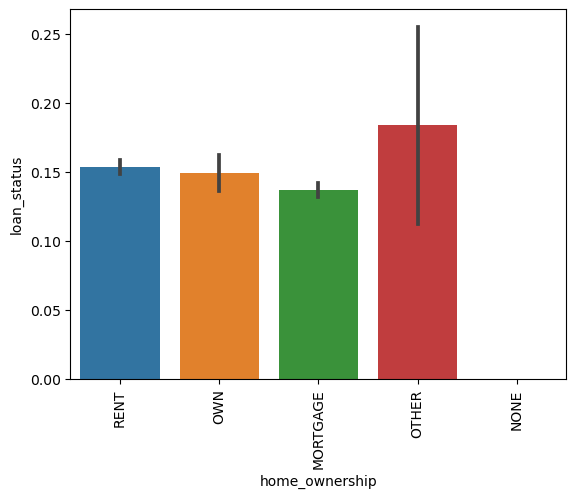

<Figure size 1800x700 with 0 Axes>

In [45]:
#Default Rate in Home Ownership
plot_cat('home_ownership')

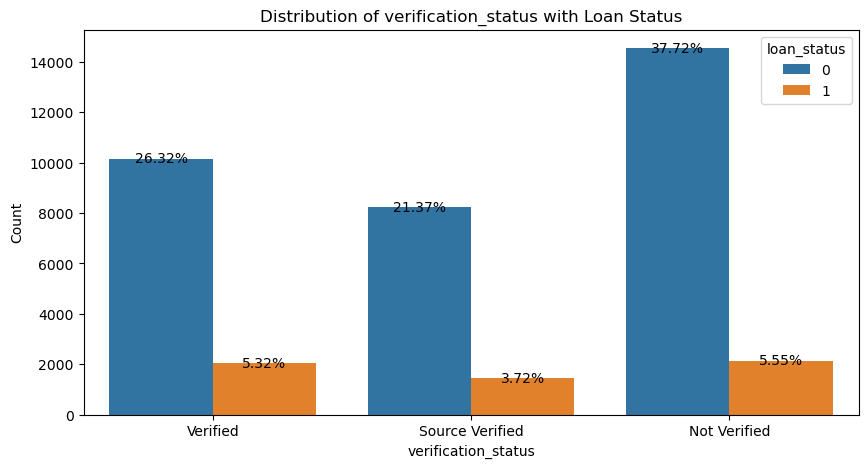

In [46]:
# Creating a bar plot of verification_status grouping by the Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=Loan_data, x='verification_status', hue='loan_status')
plt.xlabel('verification_status')
plt.ylabel('Count')
plt.title('Distribution of verification_status with Loan Status')
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

##### **Observation:** For Most of the borrowers **~44%** the income status is not verified by LC



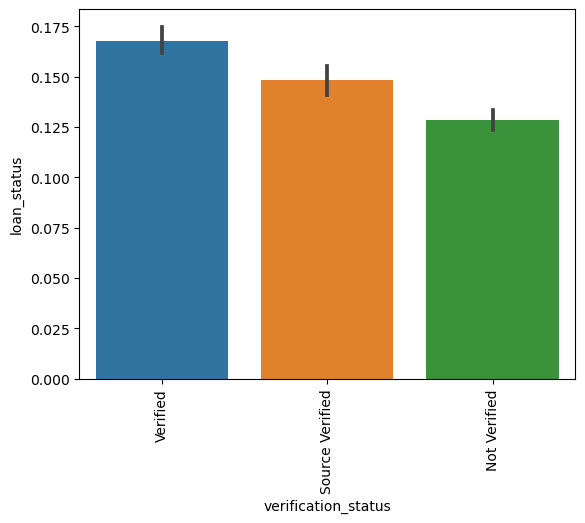

<Figure size 1800x700 with 0 Axes>

In [47]:
#Default Rate in verification_status
plot_cat('verification_status')

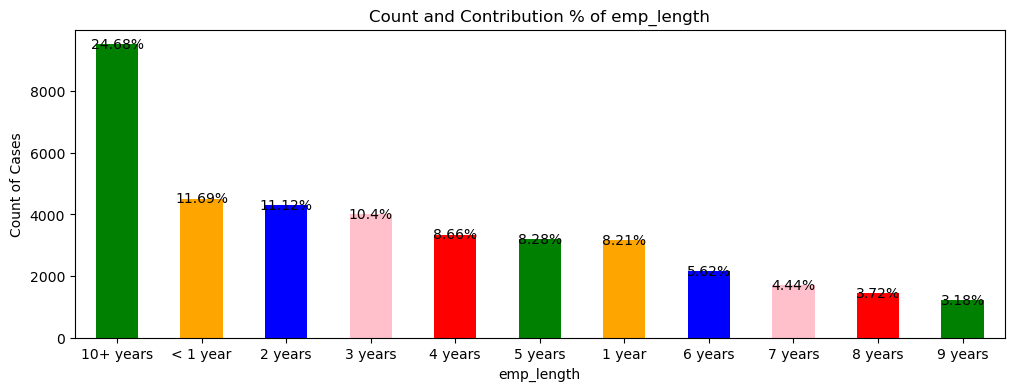

In [48]:
#Creating a countplot for Employee Lenght

emp_length_counts = Loan_data['emp_length'].value_counts()

# Creating a bar plot of the term Status
emp_length_counts.plot(kind='bar', title="Count and Contribution % of emp_length", color=['green','orange','blue','pink','red'])
plt.xlabel('emp_length')
plt.ylabel('Count of Cases')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(12, 4)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

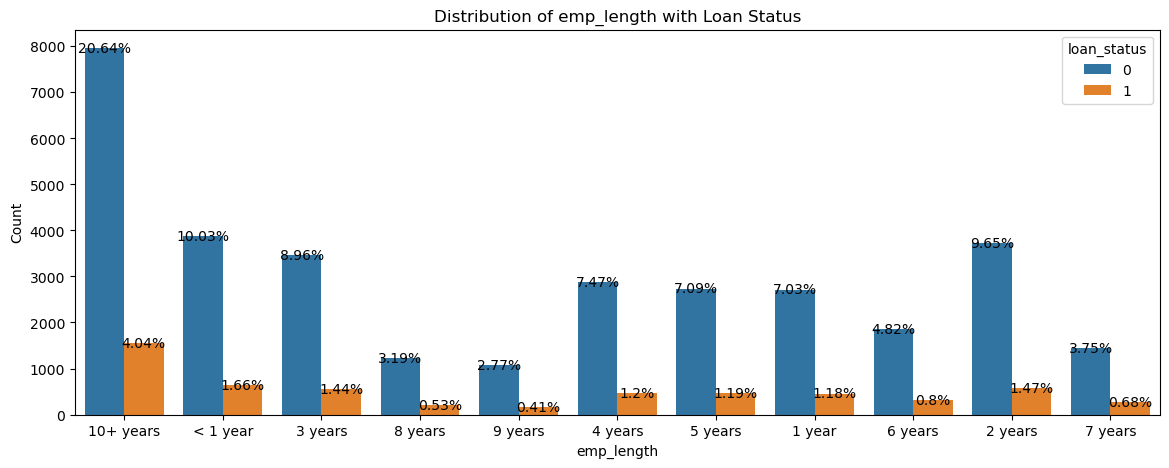

In [49]:
plt.figure(figsize=(14,5))
sns.countplot(data=Loan_data, x='emp_length', hue='loan_status')
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.title('Distribution of emp_length with Loan Status')
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

### **Observation:**

*  Most of the borrowers are having experience of 10+ years
*  Most of the defaulters are having experience of 10+ years

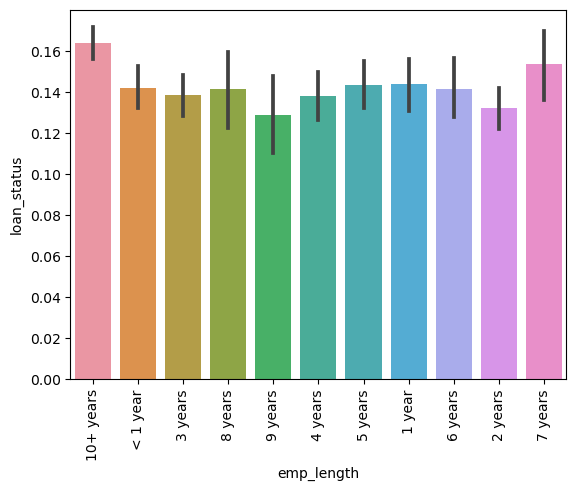

<Figure size 1800x700 with 0 Axes>

In [50]:
#Default Rate in emp_length
plot_cat('emp_length')


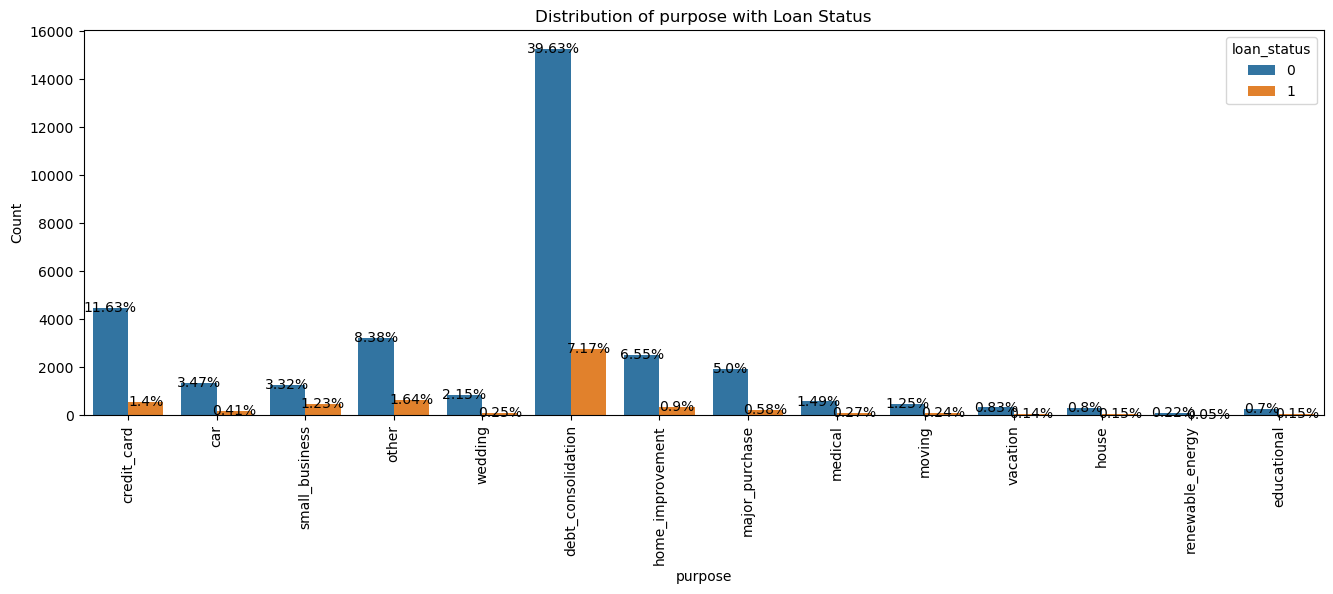

In [51]:
plt.figure(figsize=(16,5))
sns.countplot(data=Loan_data, x='purpose', hue='loan_status')
plt.xlabel('purpose')
plt.ylabel('Count')
plt.title('Distribution of purpose with Loan Status')
plt.xticks(rotation=90)
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

##### **Observation:** Most of the borrowers have taken the loan for debt consolidation followed by credit card



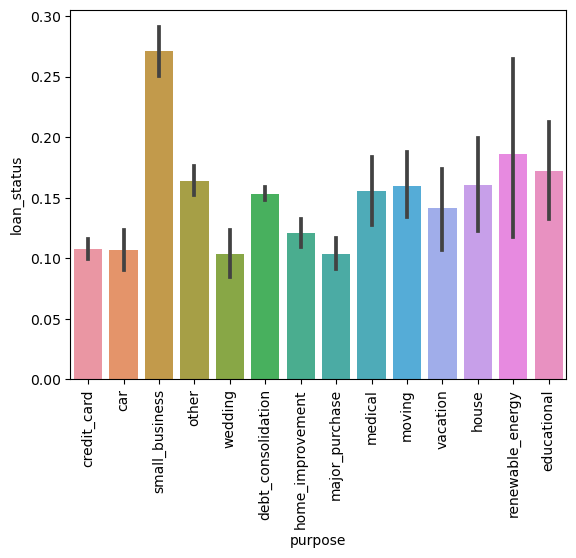

<Figure size 1800x700 with 0 Axes>

In [52]:
#Default Rate in purpose
plot_cat('purpose')

**Observation:**

* The individuals with higher salary mostly applied loans for home improvement, small business and against credit card.
* We also see the highest number of loan defaulters against the small business, debt consolidation, credit card and home improvement category

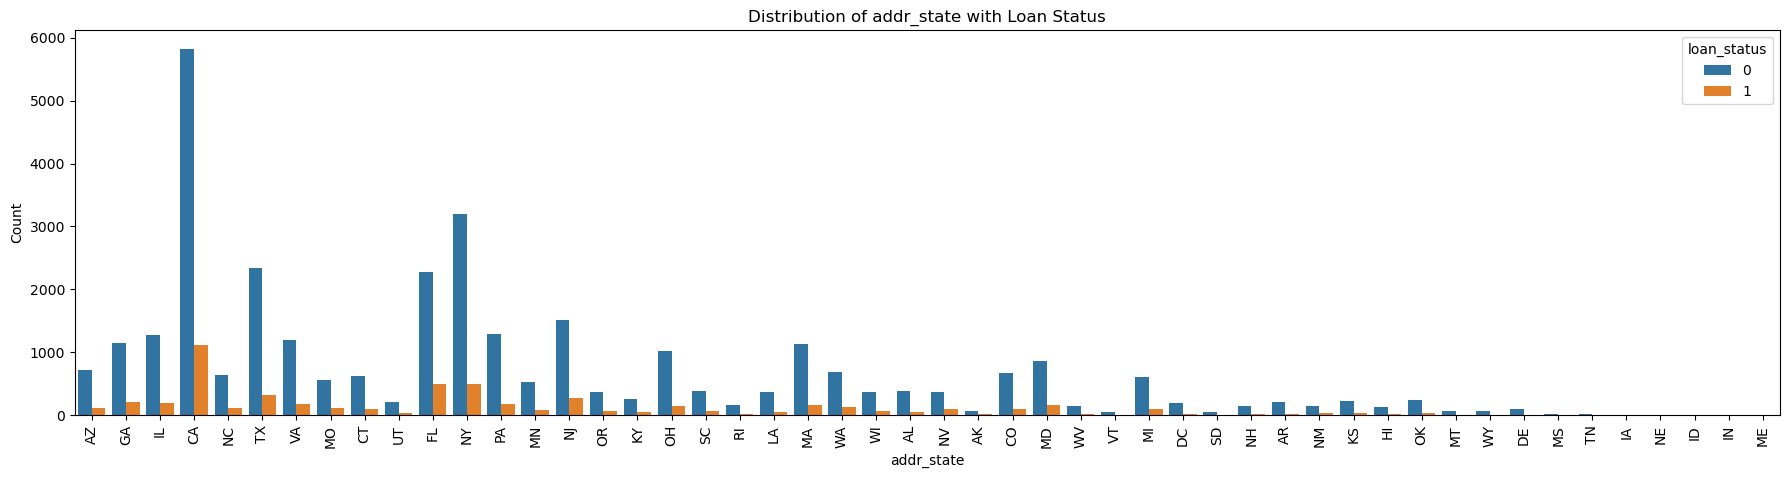

In [53]:
plt.figure(figsize=(22,5))
sns.countplot(data=Loan_data, x='addr_state', hue='loan_status')
plt.xlabel('addr_state')
plt.ylabel('Count')
plt.title('Distribution of addr_state with Loan Status')
plt.xticks(rotation=90)
plt.show()

### **Observation:** Looking at the distribution of loans along with states, we can conclude that majority of the borrowers are from big urban states like California, NewYork, Florida, Texas.

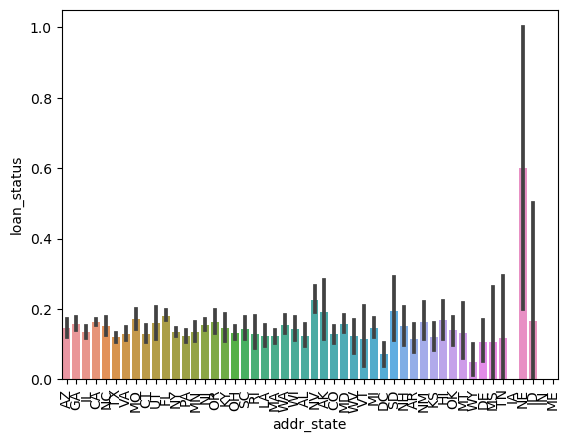

<Figure size 1800x700 with 0 Axes>

In [54]:
#Default Rate in addr_state
plot_cat('addr_state')

### **Will fo ahead and check the details for Number of Public Record Bankruptcies**

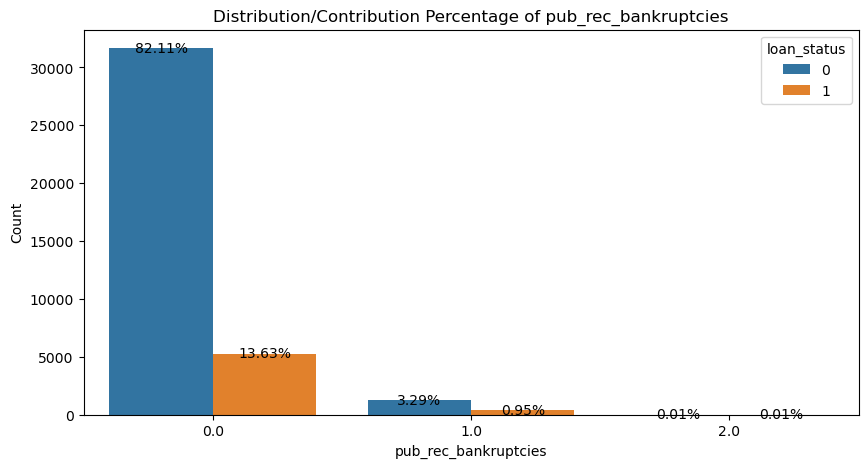

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(data=Loan_data, x='pub_rec_bankruptcies',hue='loan_status')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Count')
plt.title('Distribution/Contribution Percentage of pub_rec_bankruptcies')
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

### **Observation:** Looking at the numbers, we can most certainly say that the for majority of the borrowers, the public record for bankruptcies is "zero"

In [56]:
#handling date and time data
from datetime import datetime
Loan_data['issue_d'] = Loan_data['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# extracting month and year from issue_date

Loan_data['year'] = Loan_data['issue_d'].apply(lambda x: x.year)

Loan_data['month'] = Loan_data['issue_d'].apply(lambda x: x.month)


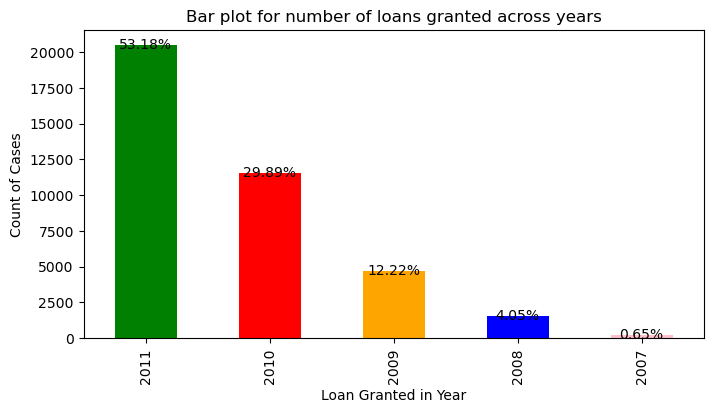

In [57]:
year_counts = Loan_data['year'].value_counts()

# Creating a bar plot of the number of loans granted across years
year_counts.plot(kind='bar', title="Bar plot for number of loans granted across years", color=['green','red','orange','blue','pink'])
plt.xlabel('Loan Granted in Year')
plt.ylabel('Count of Cases')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(8, 4)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

### **Observation:** 83.07% loans are granted in the year of 2011 and 2010.

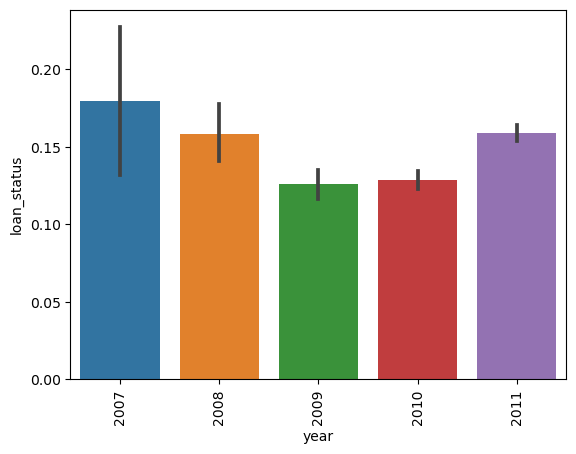

<Figure size 1800x700 with 0 Axes>

In [58]:
# compare default rates across Month of loan
plot_cat('year')

In [59]:
#Checking the details for year 2011 has the loan was granted higher in that year.
Year_2011 = Loan_data[Loan_data['year']=="2011"]

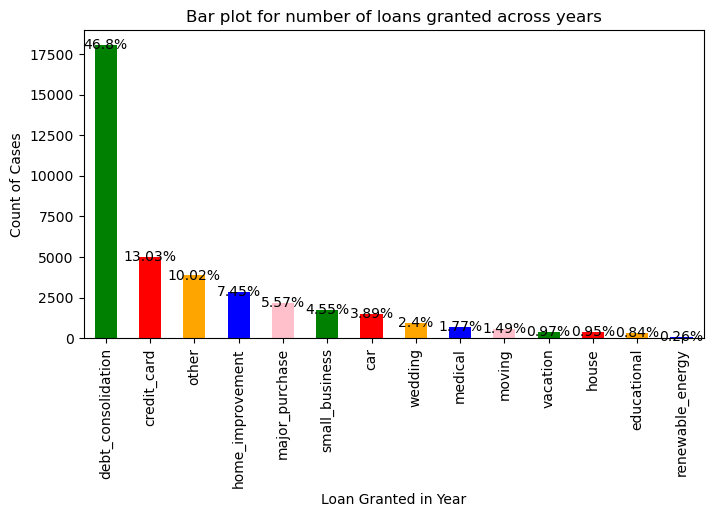

In [60]:
Year_2011 = Loan_data['purpose'].value_counts()

# Creating a bar plot of the number of loans granted across years
Year_2011.plot(kind='bar', title="Bar plot for number of loans granted across years", color=['green','red','orange','blue','pink'])
plt.xlabel('Loan Granted in Year')
plt.ylabel('Count of Cases')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(8, 4)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

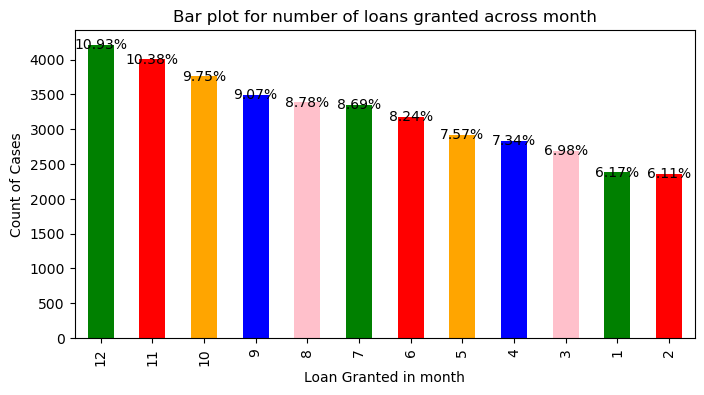

In [61]:
months_counts = Loan_data['month'].value_counts()

# Creating a bar plot of the number of loans granted across years
months_counts.plot(kind='bar', title="Bar plot for number of loans granted across month", color=['green','red','orange','blue','pink'])
plt.xlabel('Loan Granted in month')
plt.ylabel('Count of Cases')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(8, 4)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

### **Observation:** The number of loans granted across the month is following a increasing trend by the month and number of loans granted are on higer side in the month of Sep, Oct, Nov and Dec.

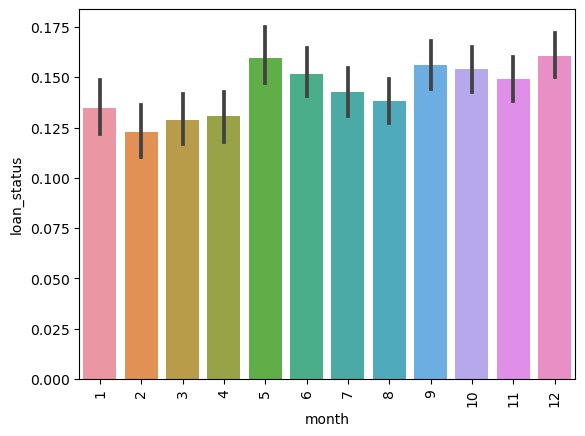

<Figure size 1800x700 with 0 Axes>

In [62]:
# compare default rates across Month of loan
plot_cat('month')

In [63]:
# Setting the bin in loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'

Loan_data['loan_amnt_Bucket'] = Loan_data['loan_amnt'].apply(lambda x: loan_amount(x))

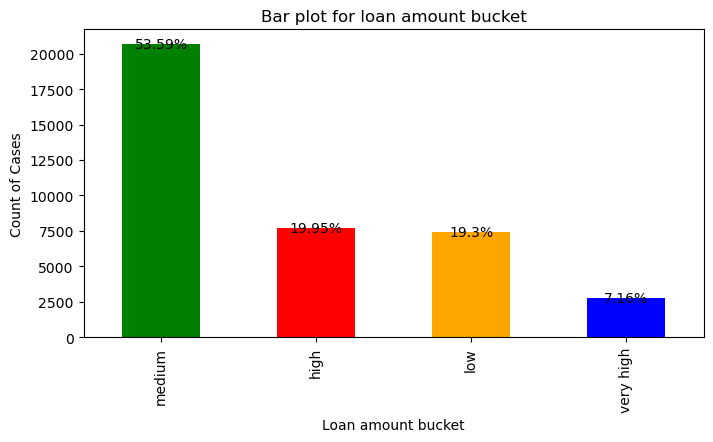

In [64]:
loan_amnt_counts = Loan_data['loan_amnt_Bucket'].value_counts()

# Creating a bar plot for loan amount
loan_amnt_counts.plot(kind='bar', title="Bar plot for loan amount bucket", color=['green','red','orange','blue','pink'])
plt.xlabel('Loan amount bucket')
plt.ylabel('Count of Cases')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(8, 4)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

### **Observation:** If the loan amount is high than the number of chances to default would be on higher side

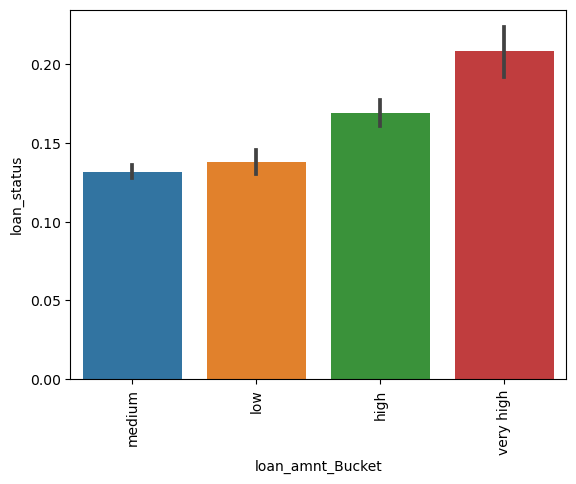

<Figure size 1800x700 with 0 Axes>

In [65]:
# compare default rates across loan_amnt_Bucket
plot_cat('loan_amnt_Bucket')

<Axes: xlabel='loan_amnt'>

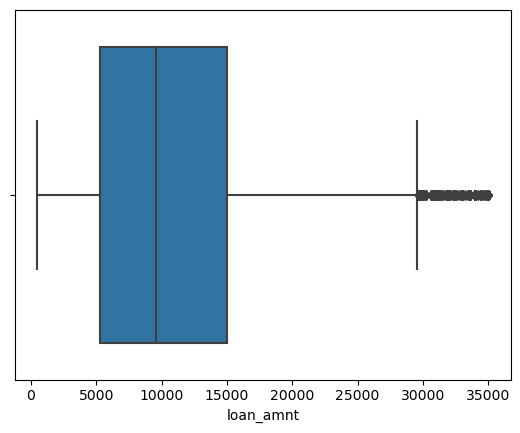

In [66]:
# creating box plot for loan_amnt

sns.boxplot(x = Loan_data['loan_amnt'])


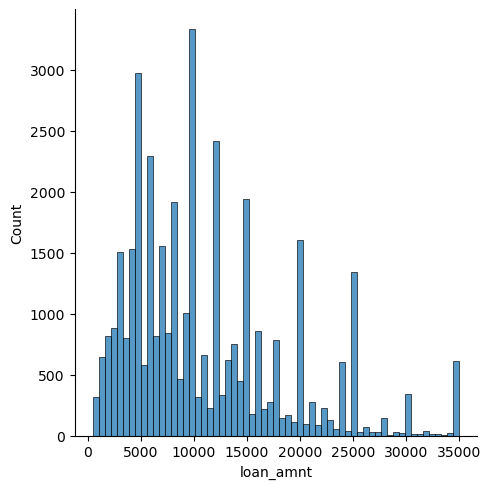

In [67]:
#creating displot to check the loan amount distribution
sns.displot(Loan_data['loan_amnt'])
plt.show()

In [68]:
# Creating bucket for funded amount invested to bins
Loan_data['funded_amnt_inv_bucket'] = Loan_data['funded_amnt_inv'].apply(lambda x: loan_amount(x))

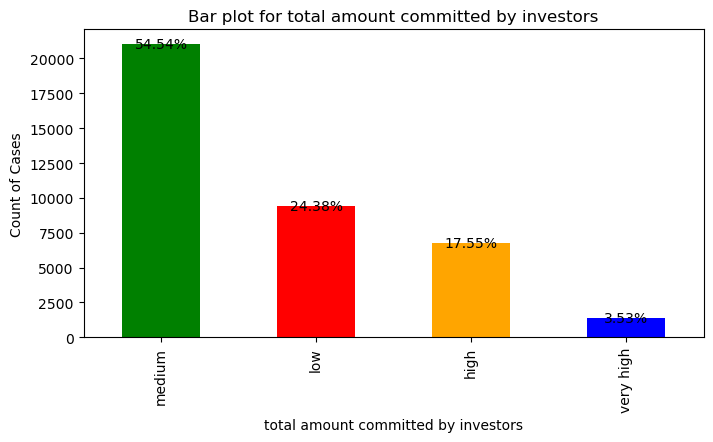

In [69]:
funded_amnt_inv_bucket_counts = Loan_data['funded_amnt_inv_bucket'].value_counts()

# Creating a bar plot of The total amount committed by investors for that loan at that point in time.

funded_amnt_inv_bucket_counts.plot(kind='bar', title="Bar plot for total amount committed by investors", color=['green','red','orange','blue','pink'])
plt.xlabel('total amount committed by investors')
plt.ylabel('Count of Cases')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(8, 4)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

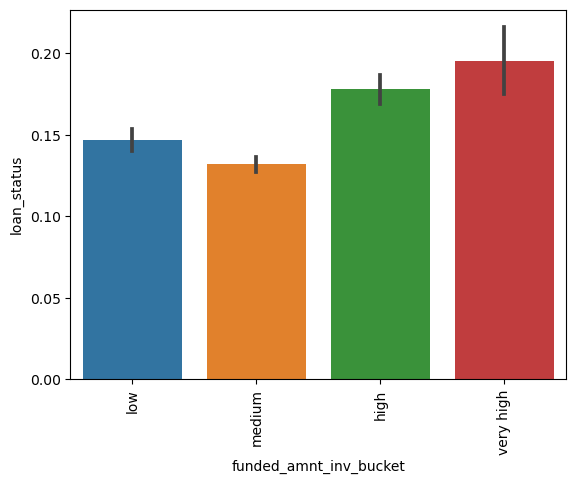

<Figure size 1800x700 with 0 Axes>

In [70]:
# compare default rates across funded_amnt_inv_bucket of loan
plot_cat('funded_amnt_inv_bucket')

In [71]:
# Will convert the interest rate in bucket also

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'


Loan_data['int_rate_bucket'] = Loan_data['int_rate'].apply(lambda x: int_rate(x))

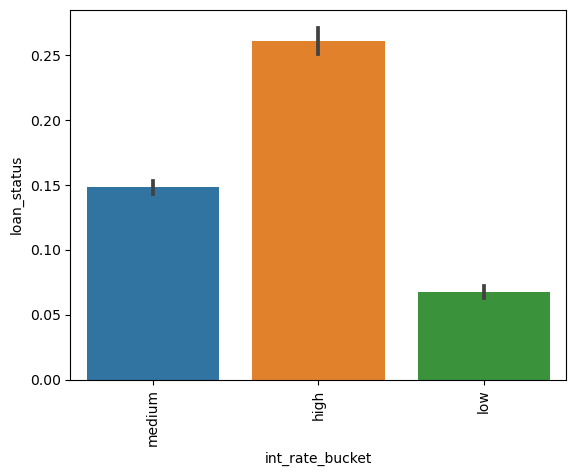

<Figure size 1800x700 with 0 Axes>

In [72]:
# compare default rates across int_rate_bins of loan
plot_cat('int_rate_bucket')

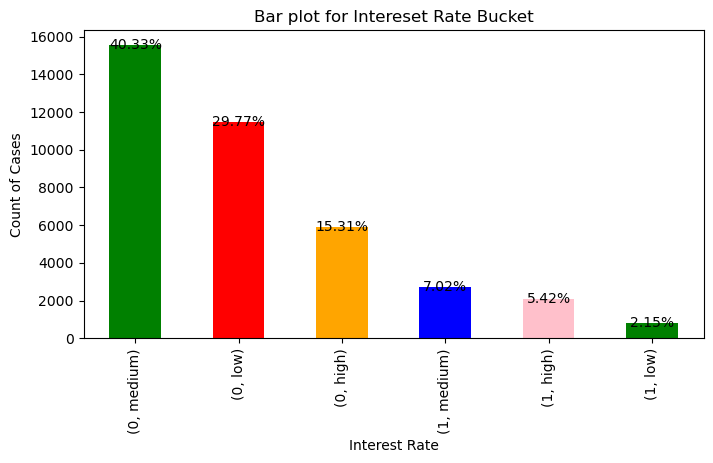

In [73]:
# groupping the data by "loan_status" for int_rate_bucket

import matplotlib.pyplot as plt
loan_status_group = Loan_data.groupby('loan_status')
int_rate_bucket_counts = loan_status_group['int_rate_bucket'].value_counts()

# Creating a bar plot of The total amount committed by investors for that loan at that point in time.

int_rate_bucket_counts.plot(kind='bar', title="Bar plot for Intereset Rate Bucket", color=['green','red','orange','blue','pink'])
plt.xlabel('Interest Rate')
plt.ylabel('Count of Cases')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(8, 4)

# Annotate the bars with the count values
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()


In [74]:
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'


Loan_data['dti'] = Loan_data['dti'].apply(lambda x: dti(x))

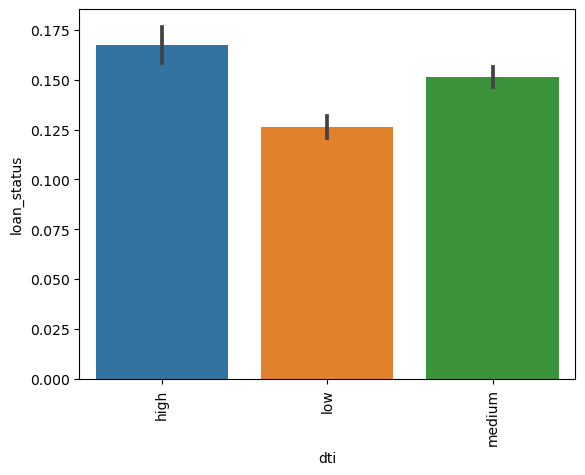

<Figure size 1800x700 with 0 Axes>

In [75]:
# compare default rates across dti of loan
plot_cat('dti')

### **Observation:** Looking at the distribution we can conclude that for majority of the borrowers, the debt to income ratio is very high, majorly concentrated at the medium category.

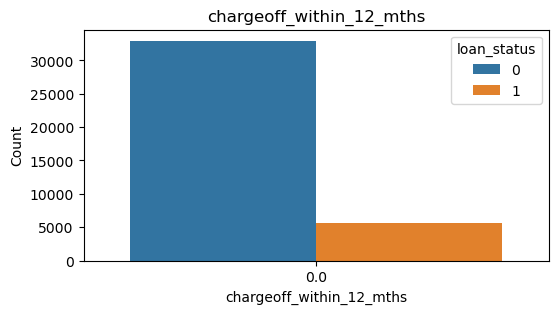

In [76]:
#inq_last_6mths

plt.figure(figsize=(6,3))
sns.countplot(data=Loan_data, x='chargeoff_within_12_mths', hue='loan_status')
plt.xlabel('chargeoff_within_12_mths')
plt.ylabel('Count')
plt.title('chargeoff_within_12_mths')
plt.show()

In [77]:
x = Loan_data["annual_inc"]

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


print("Lower Fence: ", min(x[x>Lower_Fence]))
print("Upper Fence: ", max(x[x<Upper_Fence]))

print("Value of 70th quantile: ", x.quantile(0.70))
print("Value of 80th quantile: ", x.quantile(0.80))
print("Value of 85th quantile: ", x.quantile(0.85))
print("Value of 90th quantile: ", x.quantile(0.90))
print("Value of 95th quantile: ", x.quantile(0.95))
print("Value of 96th quantile: ", x.quantile(0.96))
print("Value of 97th quantile: ", x.quantile(0.97))
print("Value of 98th quantile: ", x.quantile(0.98))
print("Value of 99th quantile: ", x.quantile(0.99))

print("Max value of annual_inc: ", max(x))

Lower Fence:  4000.0
Upper Fence:  144997.0
Value of 70th quantile:  75000.0
Value of 80th quantile:  90000.0
Value of 85th quantile:  100000.0
Value of 90th quantile:  115000.0
Value of 95th quantile:  140004.0
Value of 96th quantile:  150000.0
Value of 97th quantile:  165000.0
Value of 98th quantile:  187000.0
Value of 99th quantile:  234143.99999999878
Max value of annual_inc:  6000000.0


* The values after 95th quantile seems to be varying from the general disrtibution and also there is a increase in values for small quantile variation, so consideing threshold of 95th quantile to remove the outliers


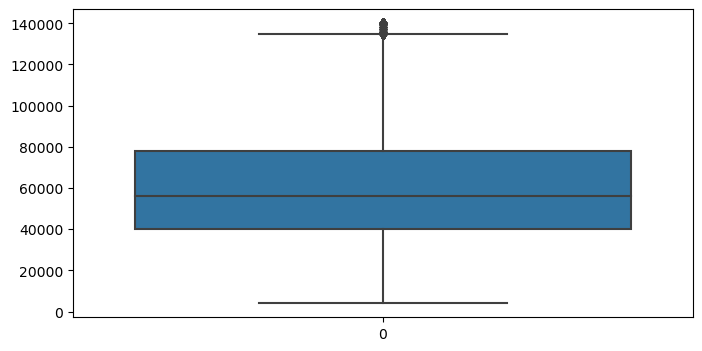

In [78]:
annual_inc_95_quan = Loan_data['annual_inc'].quantile(0.95)
loan_data = Loan_data[Loan_data['annual_inc'] <= annual_inc_95_quan]

#plotting boxplot after removing outliers for annual_inc
plt.figure(figsize=(8,4))
sns.boxplot(loan_data['annual_inc'])
plt.show()

*  Now, after removing the outlier values for annual_inc, the data values looks good.


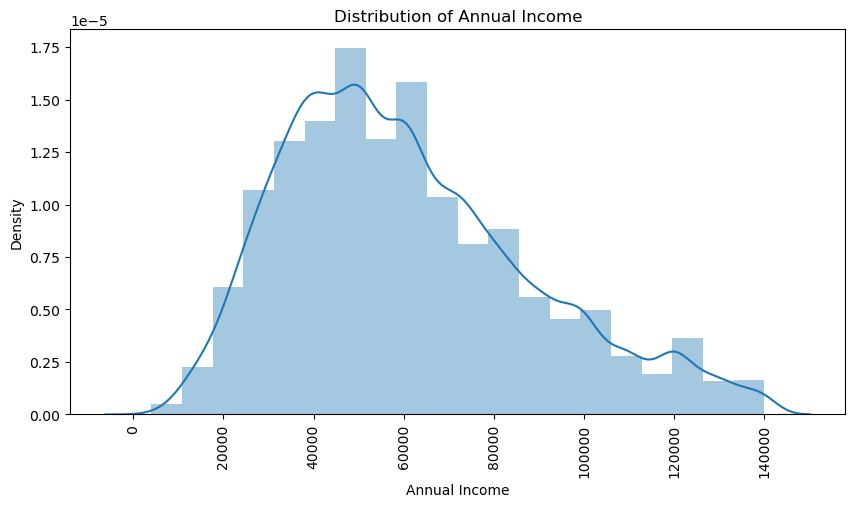

In [79]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan_data["annual_inc"],kde=True,bins=20)
plt.xticks(rotation='vertical')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Distribution of Annual Income')
plt.show()

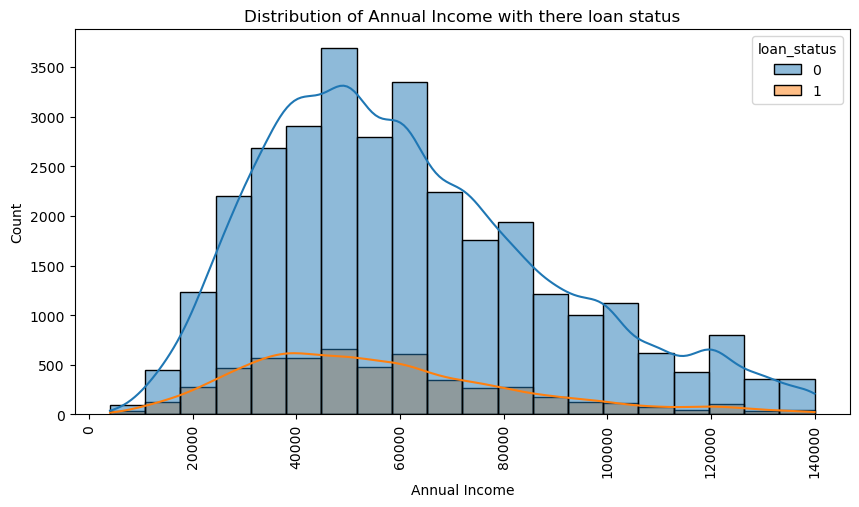

In [80]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data, x="annual_inc",hue='loan_status',kde=True,bins=20)
plt.xticks(rotation='vertical')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income with there loan status')
plt.show()

### **Observation:**

* The distribution for Annual Income looks like a normal distribution but it is left skewed. So we can say that most of the borrowers have low annual income.
Borrowers with less than 50000 as the annual income are most likely to default the loan.

In [81]:
#creating bins for int_rate, open_acc, revol_util, total_acc
loan_data['int_rate_bins'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['loan_amnt_bins'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['annual_inc_bins'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])


# Analyzing interest rate for the loans with respect to the interest rate bins created


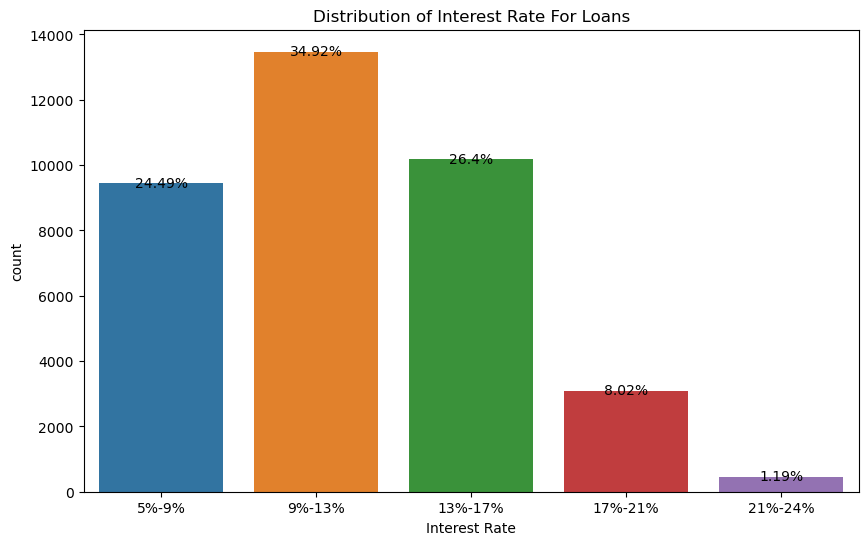

In [82]:
# int_rate_bins

plt.figure(figsize = (10,6))
sns.countplot(data=loan_data, x='int_rate_bins')
plt.xlabel('Interest Rate')
plt.title('Distribution of Interest Rate For Loans')
for p in plt.gca().patches:
  plt.annotate(str(round((p.get_height()/loan_status_counts.sum())*100,2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
plt.show()

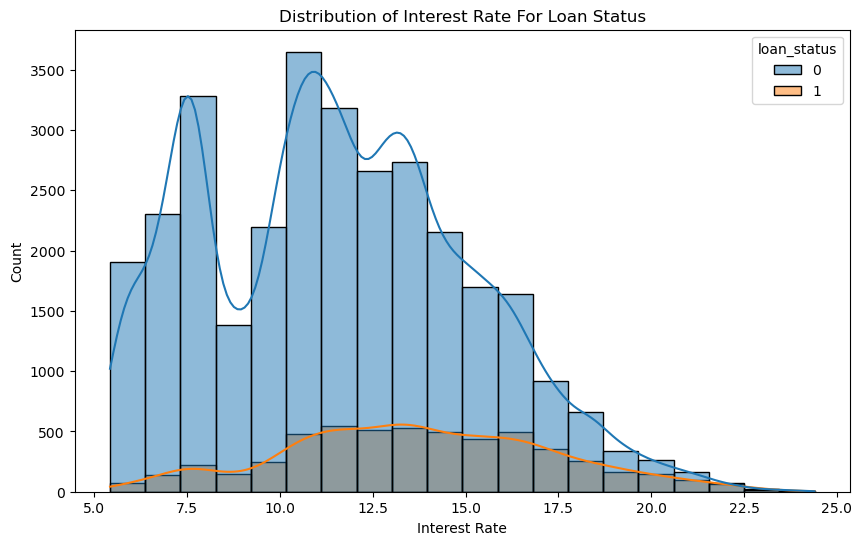

In [83]:
plt.figure(figsize=(10,6))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status')
plt.show()

**Observation:**

*  For the borrowers where the interest rate is between 13%-17% - the defaulters % is more as compared to borrowers with other interest rate percentage
*  The rate of defaulters decreases and continues to decrease if the interest rate is more than 17%

# Analyzing Annual Income for the loans with respect to Annual Income bins created


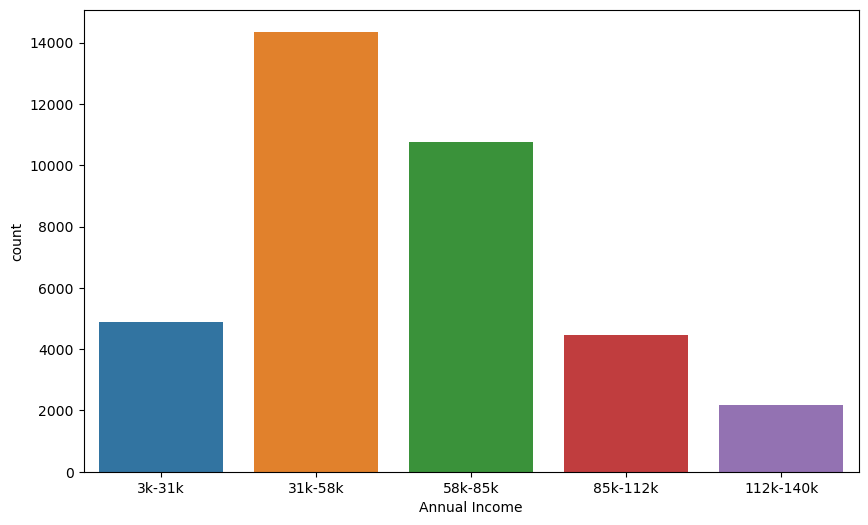

In [84]:
# annual_inc_bins
plt.figure(figsize = (10,6))
sns.countplot(data=loan_data, x='annual_inc_bins')
plt.xlabel("Annual Income")
plt.show()

**Observation:**

* The mean and 25th quantile is same for both Fully Paid and Charged Off loans
* We see a larger 75% quantile in "Charged Off" loans - indicating larger the amount of loan, higher the chance of defaulting.

# Analyzing Annual Income column against Loan Amount


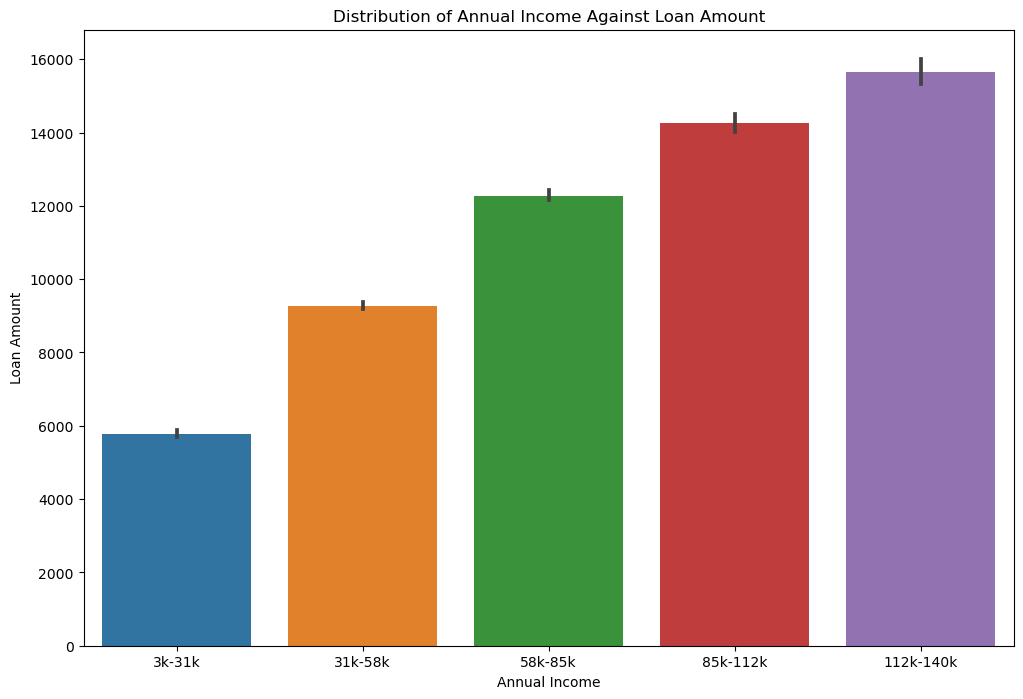

In [85]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,y='loan_amnt',x='annual_inc_bins')
plt.ylabel('Loan Amount')
plt.xlabel('Annual Income')
plt.title('Distribution of Annual Income Against Loan Amount')
plt.show()

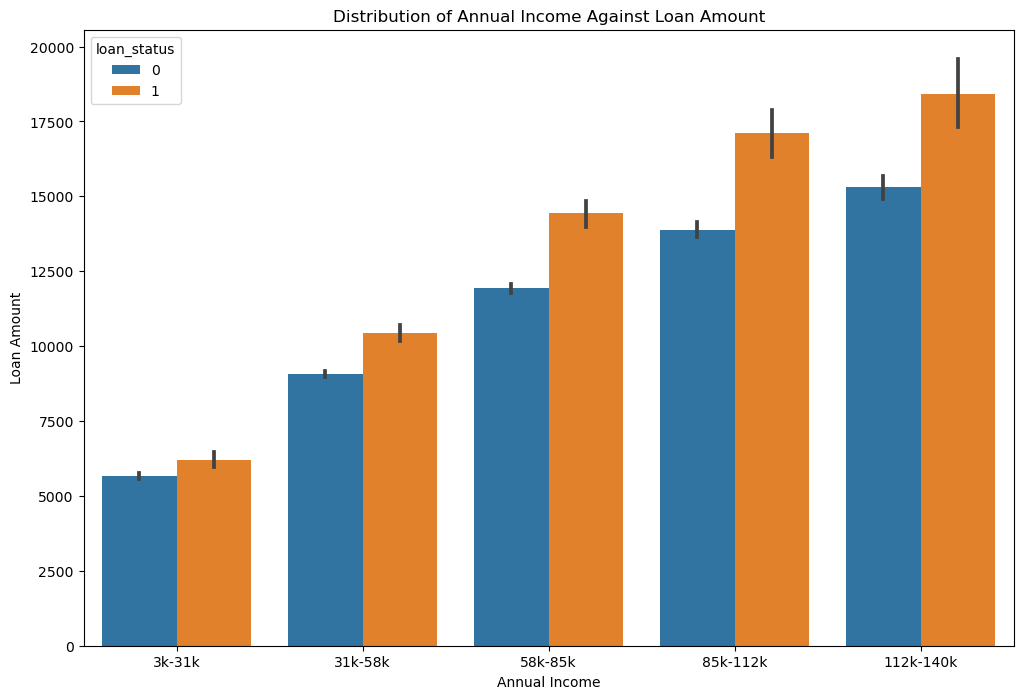

In [86]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,y='loan_amnt',x='annual_inc_bins', hue='loan_status')
plt.ylabel('Loan Amount')
plt.xlabel('Annual Income')
plt.title('Distribution of Annual Income Against Loan Amount')
plt.show()

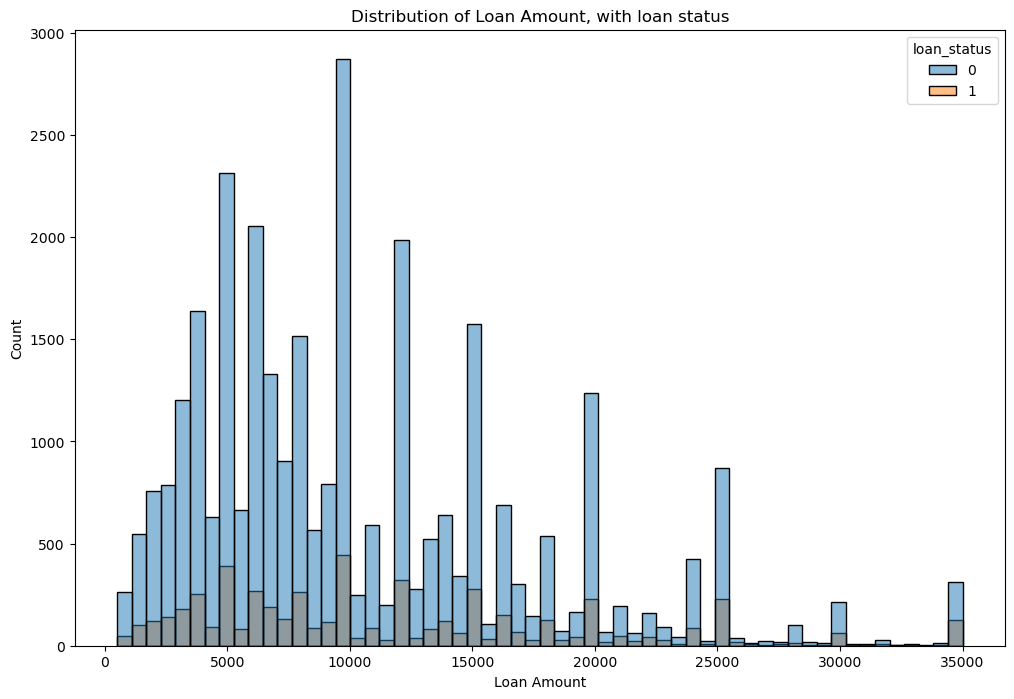

In [87]:
plt.figure(figsize=(12,8))
sns.histplot(data=loan_data,x='loan_amnt', hue='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount, with loan status')
plt.show()

# Analyzing Loan Amount column against Interest Rate


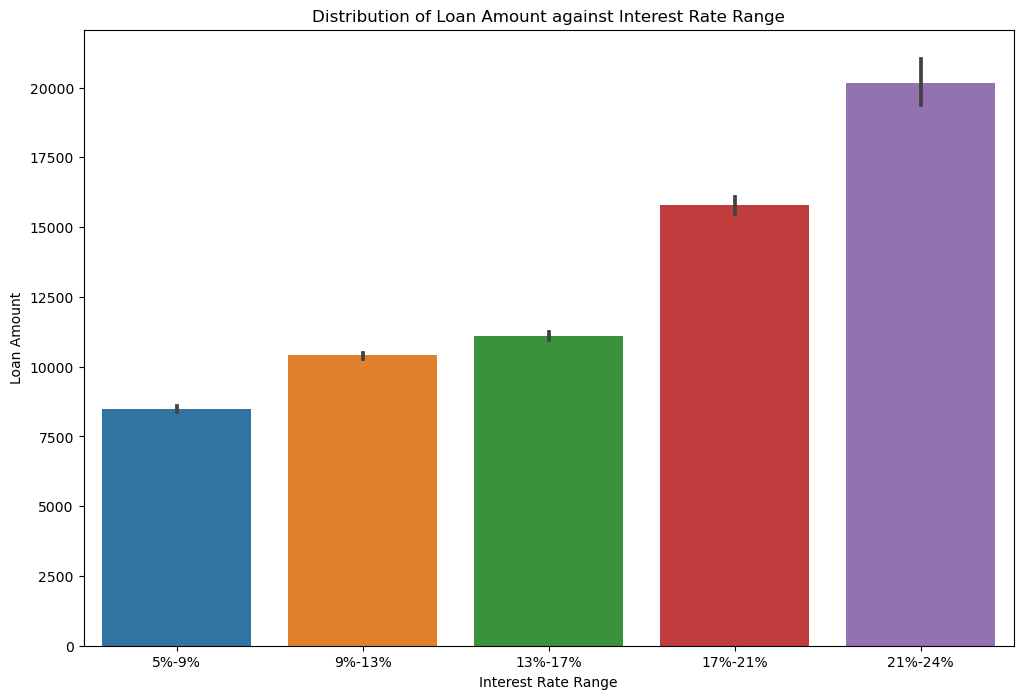

In [88]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,y='loan_amnt',x='int_rate_bins')
plt.ylabel('Loan Amount')
plt.xlabel('Interest Rate Range')
plt.title('Distribution of Loan Amount against Interest Rate Range')
plt.show()

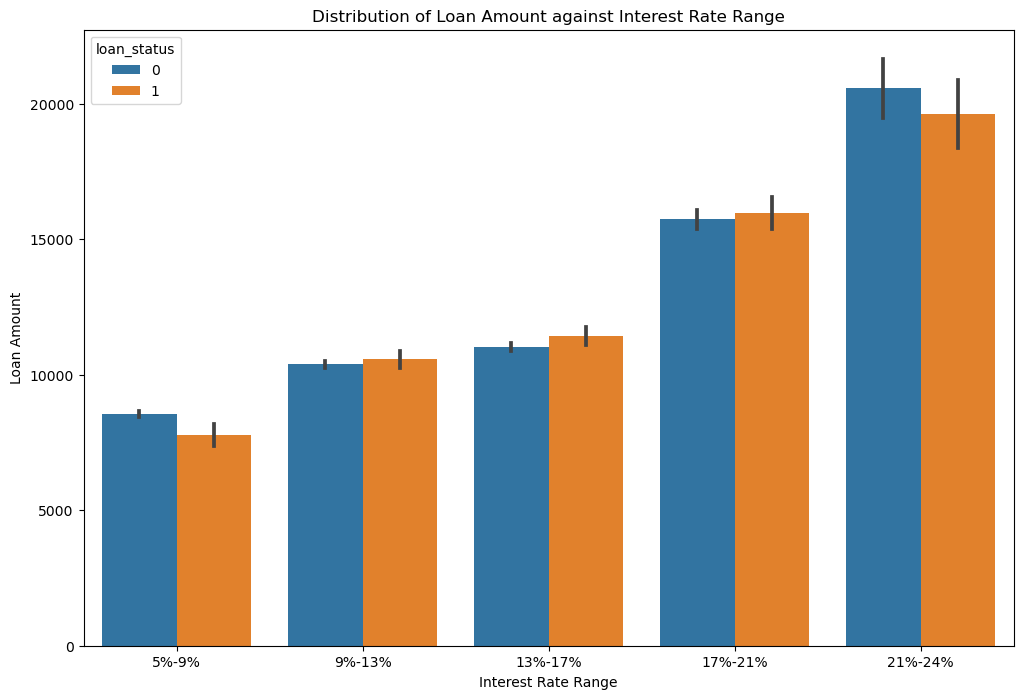

In [89]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,y='loan_amnt',x='int_rate_bins', hue='loan_status')
plt.ylabel('Loan Amount')
plt.xlabel('Interest Rate Range')
plt.title('Distribution of Loan Amount against Interest Rate Range')
plt.show()

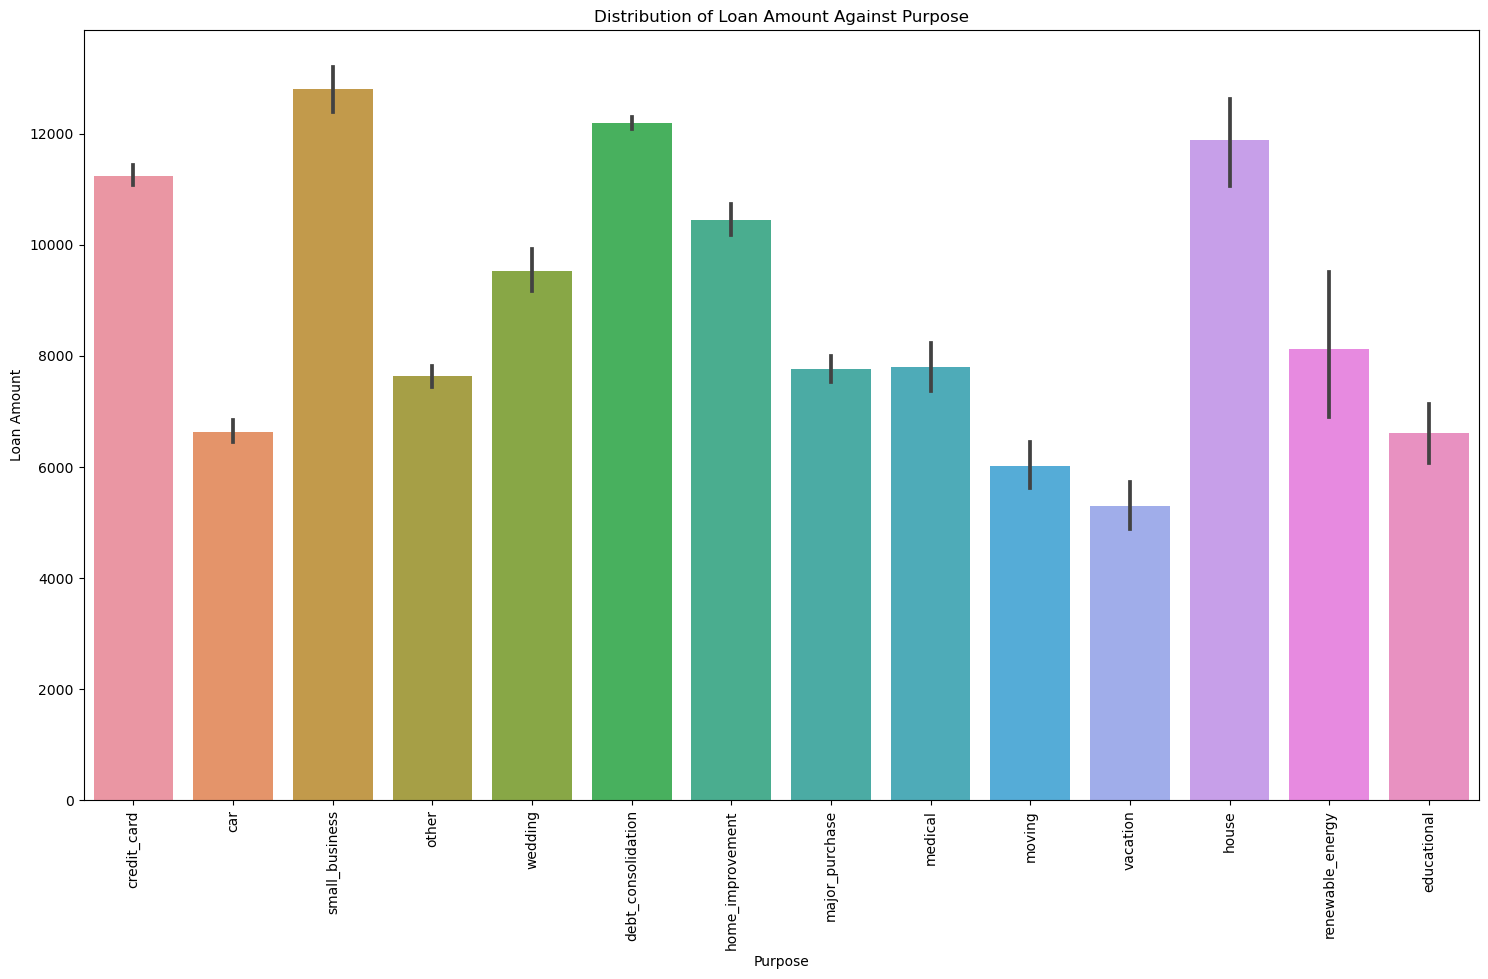

In [90]:
plt.figure(figsize=(18,10))
sns.barplot(data=loan_data,x='purpose',y='loan_amnt')
plt.xticks(rotation='vertical')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount Against Purpose')
plt.show()

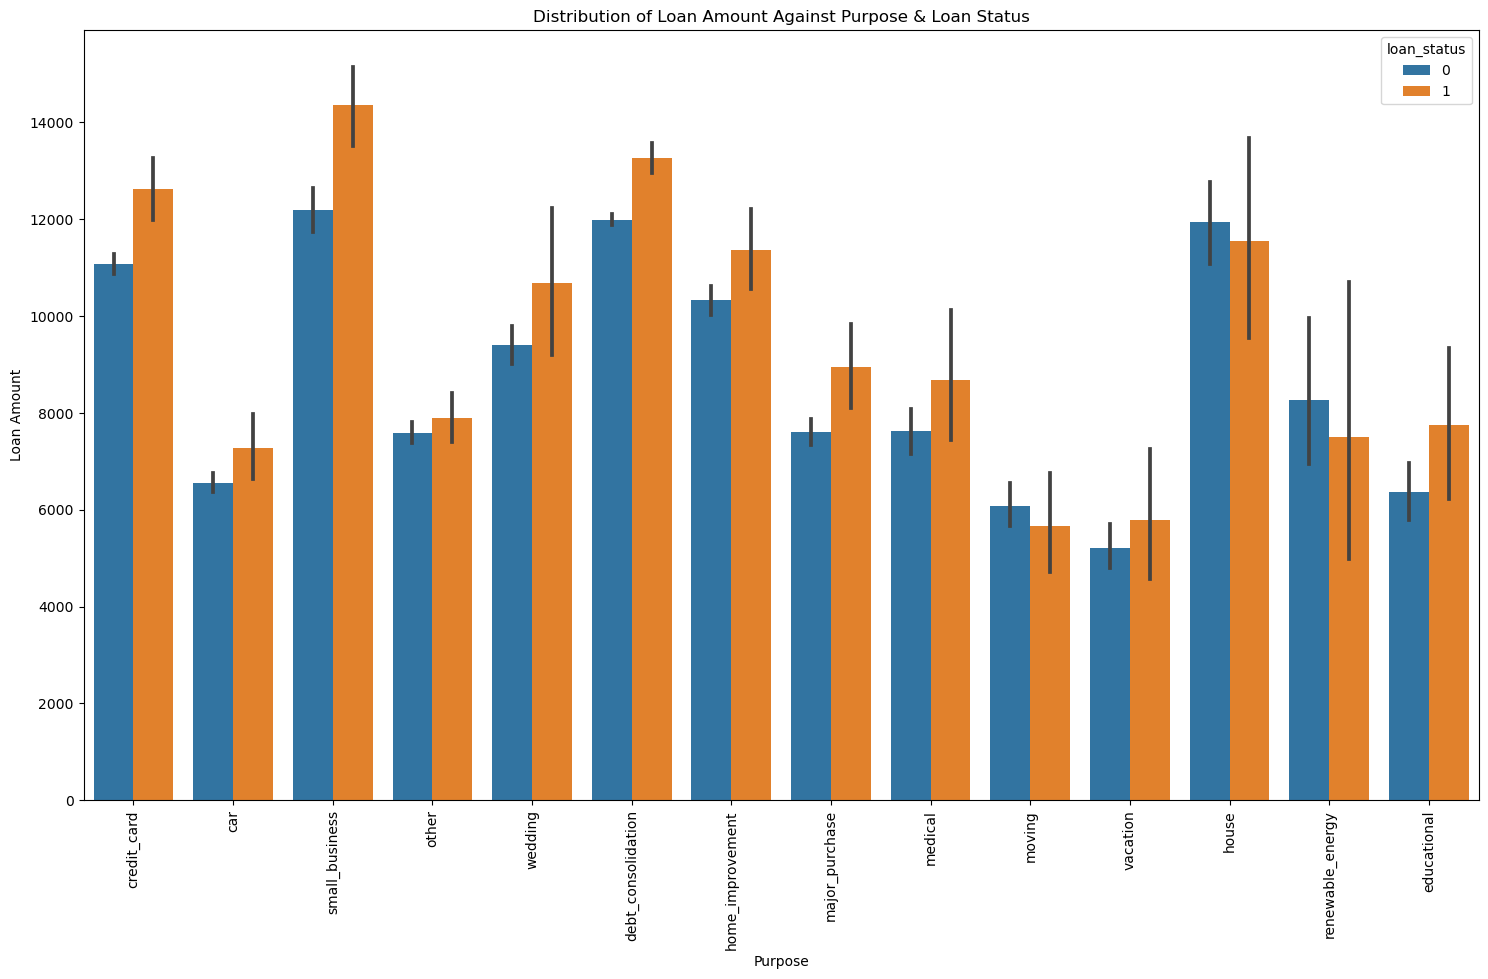

In [91]:
plt.figure(figsize=(18,10))
sns.barplot(data=loan_data,x='purpose',y='loan_amnt',hue='loan_status')
plt.xticks(rotation='vertical')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount Against Purpose & Loan Status')
plt.show()

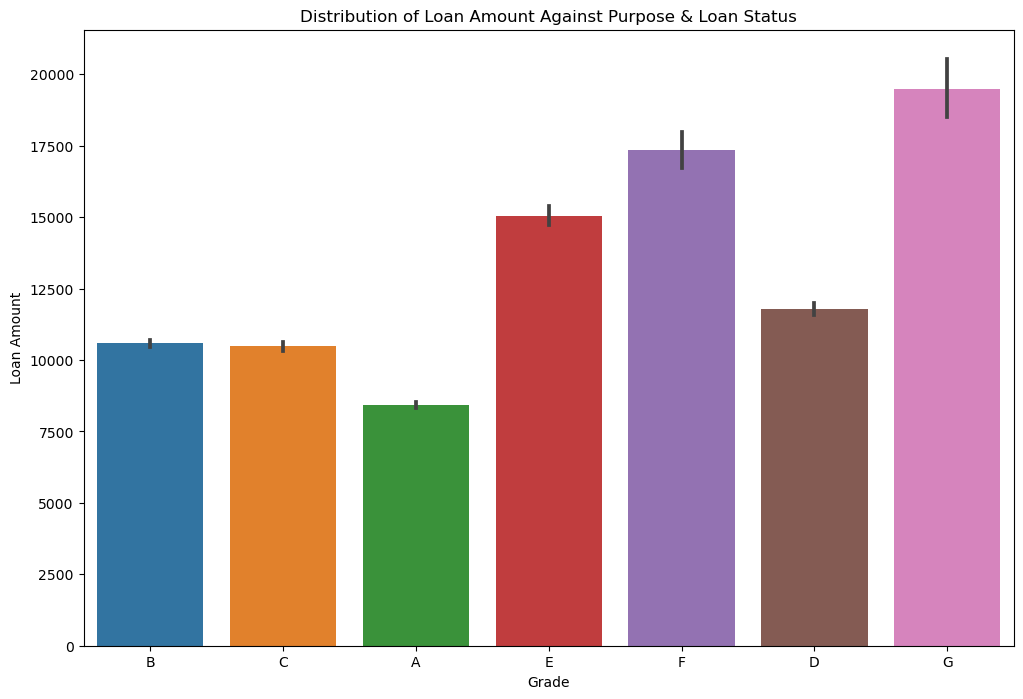

In [92]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,x='grade',y='loan_amnt')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount Against Purpose & Loan Status')
plt.show()

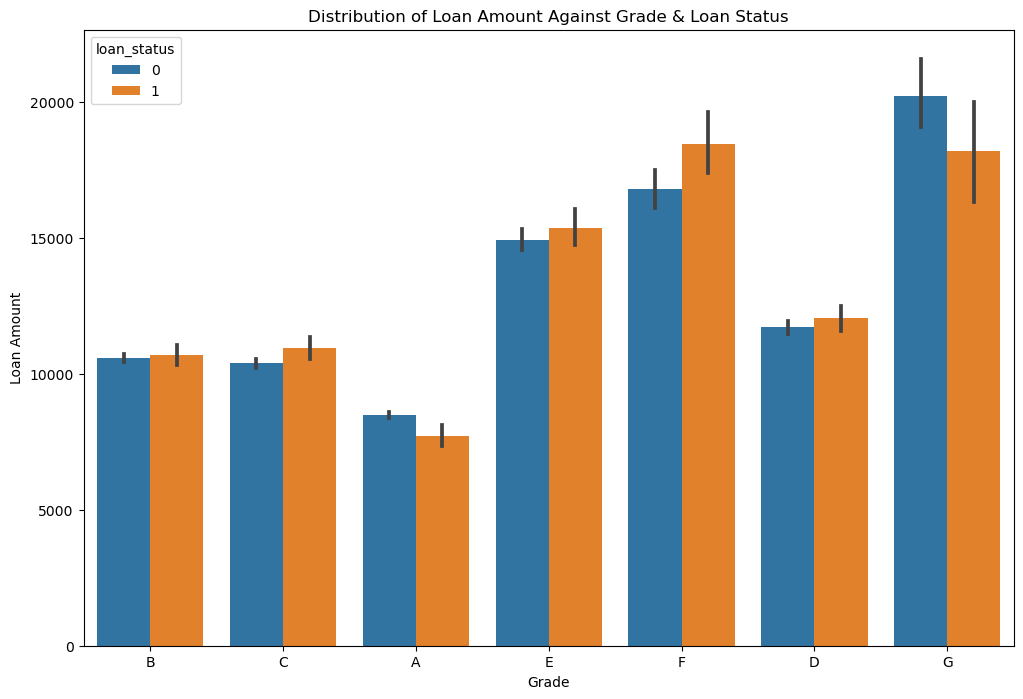

In [93]:
plt.figure(figsize=(12,8))
sns.barplot(data=loan_data,x='grade',y='loan_amnt',hue='loan_status')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount Against Grade & Loan Status')
plt.show()

# Loan against House Ownership


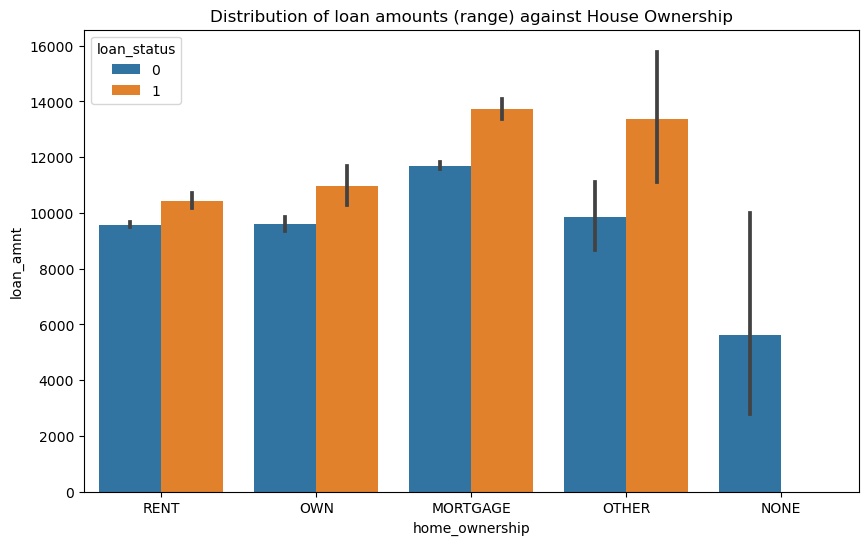

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(data =loan_data,x='home_ownership', y='loan_amnt', hue ='loan_status')
plt.title("Distribution of loan amounts (range) against House Ownership")
plt.show()

# Loan Amount against Interest rates


<Figure size 640x480 with 0 Axes>

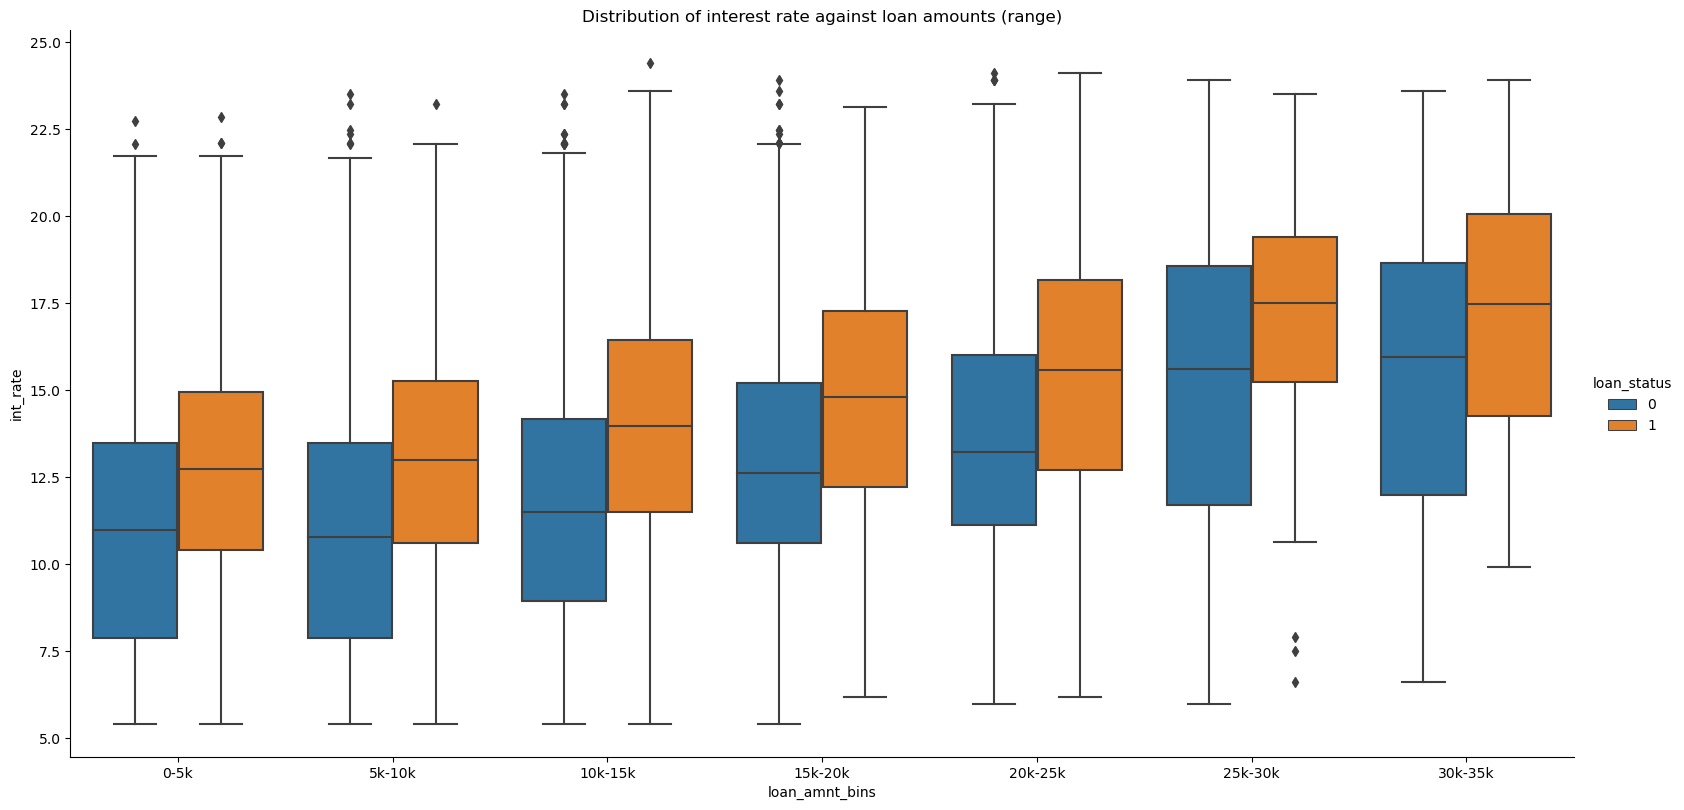

In [95]:
plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_bins', hue ='loan_status',kind = 'box',height=8, aspect=2)
plt.title("Distribution of interest rate against loan amounts (range)")
plt.show()

**Observation:**

* Interest rate for charged off loans is pretty high as compared to fully paid loans
* This can be a very strong factor for loan defaulting

In [96]:
Loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'year', 'month',
       'loan_amnt_Bucket', 'funded_amnt_inv_bucket', 'int_rate_bucket'],
      dtype='object')

In [97]:
corr_data = Loan_data[['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'loan_status',
       'pub_rec_bankruptcies',  'year', 'month']]

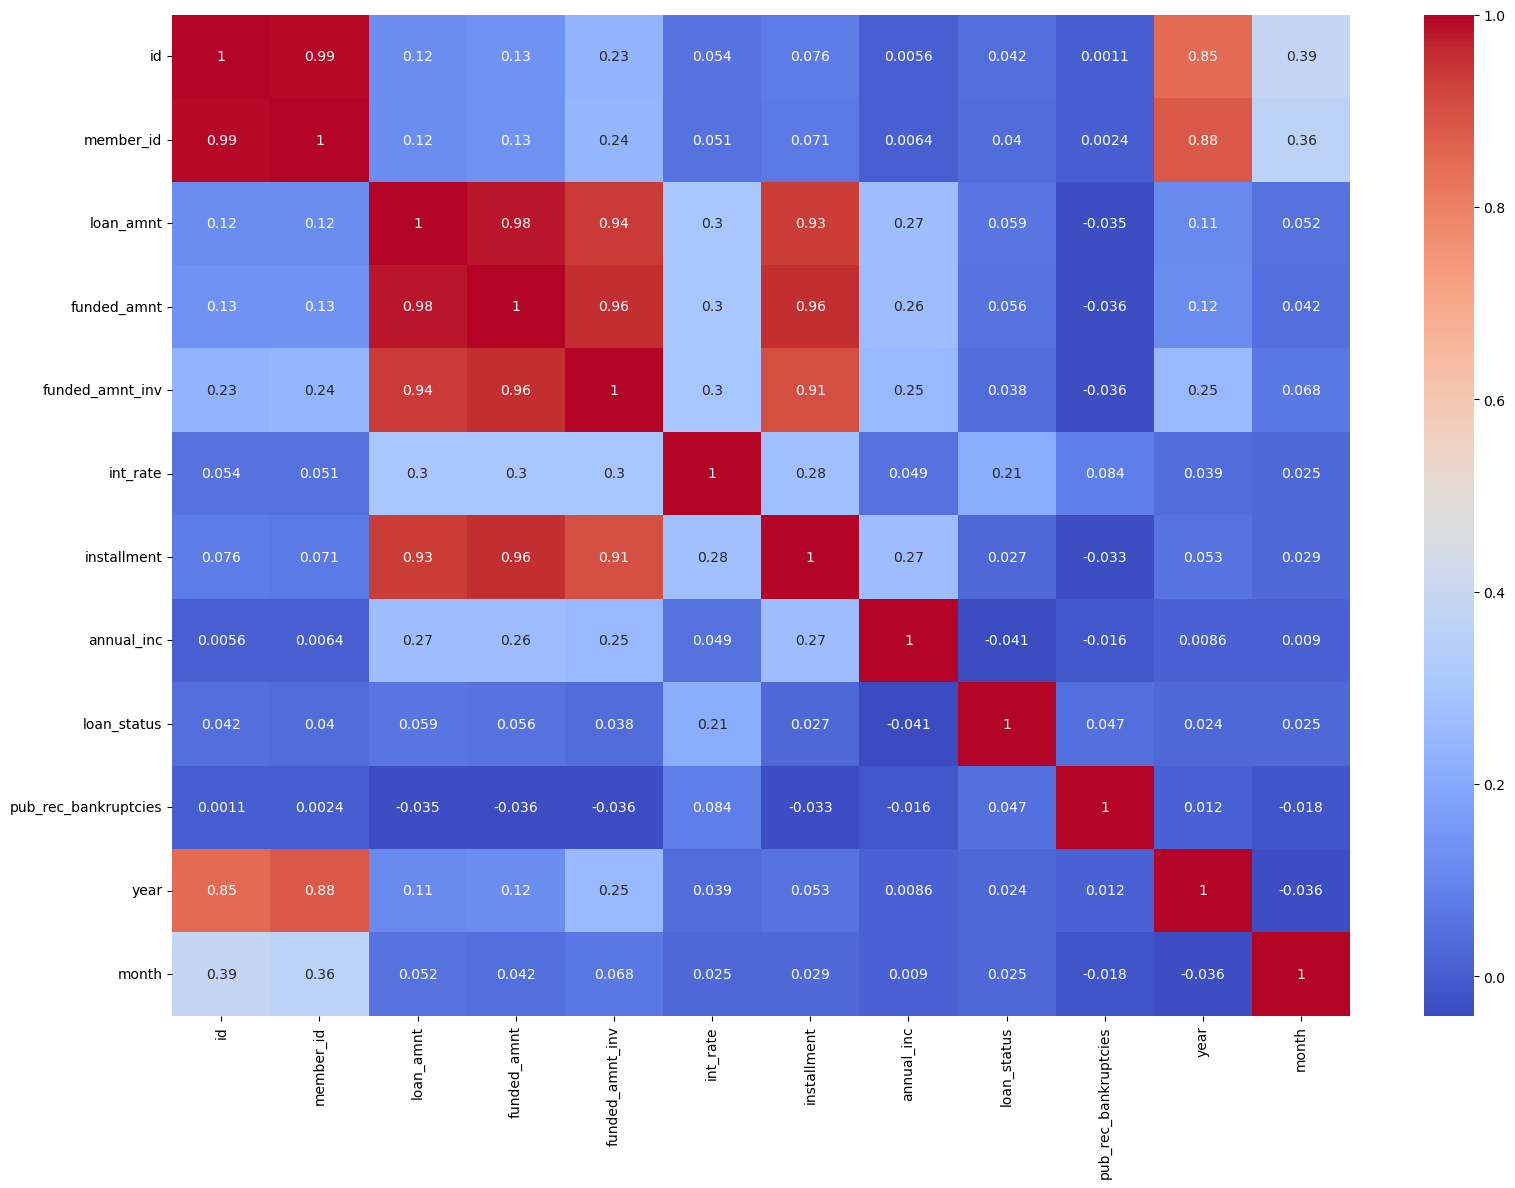

In [98]:
plt.figure(figsize=(19,13))
sns.heatmap(corr_data.corr(),annot = True, cmap = 'coolwarm')
plt.show()

### Observation:

* In correlation metrics, there is slight positive correlation in Interest rate and Loan Status, which is indicating that the higher the interest rate higher the chances of default.

* Interest Rate is slightly positively correlated with Loan Amount, Funded Amount, Funded amount INV and installments. Which showing the relationship is the number of installments are high than the interest rate will be high.

* There is high positive correlation of Loan Amount with Installments,  Funded Amount and Funded amount INV


# Thank You!
* Ramandeep Mehra